In [1]:
def hsv_to_rgb(h, s, v):
    """
    Convert HSV to RGB.

    Parameters:
    h (float): Hue value (0 <= h < 360).
    s (float): Saturation value (0 <= s <= 1).
    v (float): Brightness value (0 <= v <= 1).

    Returns:
    tuple: (r, g, b) where 0 <= r, g, b <= 255
    """
    r, g, b = hsv_to_rgbn(h,s,v)
    return int(r * 255), int(g * 255), int(b * 255)

def hsv_to_rgbn(h, s, v):
    h = float(h)
    s = float(s)
    v = float(v)
    h60 = h / 60.0
    h60f = h60 - int(h60)
    p = v * (1.0 - s)
    q = v * (1.0 - s * h60f)
    t = v * (1.0 - s * (1.0 - h60f))
    
    if 0 <= h60 < 1:
        r, g, b = v, t, p
    elif 1 <= h60 < 2:
        r, g, b = q, v, p
    elif 2 <= h60 < 3:
        r, g, b = p, v, t
    elif 3 <= h60 < 4:
        r, g, b = p, q, v
    elif 4 <= h60 < 5:
        r, g, b = t, p, v
    elif 5 <= h60 < 6:
        r, g, b = v, p, q
    else:
        r, g, b = 0, 0, 0

    return r,g,b

def rgb_to_hex(r, g, b):
    """
    Convert RGB to hex.

    Parameters:
    r (int): Red value (0 <= r <= 255).
    g (int): Green value (0 <= g <= 255).
    b (int): Blue value (0 <= b <= 255).

    Returns:
    str: Hex color string.
    """
    return "#{:02x}{:02x}{:02x}".format(r, g, b)

def find_intersection_points(xa, ya, xb, yb):
    # Calculate the slope (m) and y-intercept (c) of the line
    m = (yb - ya) / (xb - xa)
    c = ya - m * xa
    
    # Initialize an empty list to store the valid intersection points
    points = set()
    
    # Intersection with x = 0
    y = c
    if 0 <= y <= 1:
        points.add((0, y))
    
    # Intersection with x = 1
    y = m + c
    if 0 <= y <= 1:
        points.add((1, y))
    
    # Intersection with y = 0
    if m != 0:  # Avoid division by zero
        x = -c / m
        if 0 <= x <= 1:
            points.add((x, 0))
    
    # Intersection with y = 1
    if m != 0:  # Avoid division by zero
        x = (1 - c) / m
        if 0 <= x <= 1:
            points.add((x, 1))
    
    # Return the intersection points
    return points

def generate_hsv_line(h: float, s: float, b: float, n: int) -> list[tuple[float, float, float]]:
    """
    Generate a list of HSV colors along the line from the brightest to the darkest point.
    
    Parameters:
    h (float): Hue value.
    s (float): Saturation value.
    b (float): Brightness value.
    n (int): Number of colors to generate.
    
    Returns:
    list of tuple: List of HSV colors.
    """
    points = find_intersection_points(0, 1, s, b)
    _,(x2,y2) = points
    
    # Generate the list of HSV colors
    hsv_colors = [(h, (i * (x2/n)), 1-(i * ((1-y2)/n))) for i in range(n)]
    return hsv_colors


In [2]:
%pip install pillow numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
from PIL import Image, ImageDraw

def draw_color_swatch(color_matrix, square_size=20, output_file='color_swatch.png'):
    """
    Draws a color swatch representing a matrix of HSV color values.

    Parameters:
    color_matrix (list of list of tuples): Matrix of HSV tuples.
    square_size (int): Size of each color square. Default is 20.
    output_file (str): Filename to save the generated image. Default is 'color_swatch.png'.

    Returns:
    None
    """
    rows = len(color_matrix)
    cols = max(len(row) for row in color_matrix) if rows > 0 else 0

    # Create an image with the appropriate size
    img_width = cols * square_size
    img_height = rows * square_size
    image = Image.new('RGB', (img_width, img_height), 'white')
    draw = ImageDraw.Draw(image)

    # Draw the squares
    for row in range(rows):
        for col in range(len(color_matrix[row])):
            color = hsv_to_rgb(*color_matrix[row][col])
            top_left = (col * square_size, row * square_size)
            bottom_right = ((col + 1) * square_size - 1, (row + 1) * square_size - 1)
            draw.rectangle([top_left, bottom_right], fill=color)

    # Save the image
    image.save(output_file)
    print(f'Color swatch saved as {output_file}')


In [4]:
hsvs = [
	(0, 1, 0.60), # red
	(27, 1, 0.86), # orange
	(51, 0.95, 0.84), # yellow
	(122, 0.98, 0.35), # green
	(223, 0.99, 0.87), # blue
	(265, 0.98, 0.51), # indigo
	(278, 0.94, 0.75), # violet
	(32, 1, 0.25), # brown
	(85, 0.88, 0.75), # lime
	(180, 0.93, 0.75), # cyan
	(212, 0.70, 0.89), # sky blue
	(241, 0.98, 0.45), # deep blue
	(286, 0.81, 0.61), # purple
	(330, 1, 0.79), # pink
]
n = 8     # Number of colors to generate

color_list = [generate_hsv_line(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-xkcd.png')

color_list

Color swatch saved as colourblocks-xkcd.png


[[(0, 0.0, 1.0),
  (0, 0.125, 0.95),
  (0, 0.25, 0.9),
  (0, 0.375, 0.85),
  (0, 0.5, 0.8),
  (0, 0.625, 0.75),
  (0, 0.75, 0.7),
  (0, 0.875, 0.6499999999999999)],
 [(27, 0.0, 1.0),
  (27, 0.125, 0.9825),
  (27, 0.25, 0.965),
  (27, 0.375, 0.9475),
  (27, 0.5, 0.9299999999999999),
  (27, 0.625, 0.9125),
  (27, 0.75, 0.895),
  (27, 0.875, 0.8775)],
 [(51, 0.0, 1.0),
  (51, 0.125, 0.9789473684210526),
  (51, 0.25, 0.9578947368421052),
  (51, 0.375, 0.9368421052631579),
  (51, 0.5, 0.9157894736842105),
  (51, 0.625, 0.894736842105263),
  (51, 0.75, 0.8736842105263157),
  (51, 0.875, 0.8526315789473684)],
 [(122, 0.0, 1.0),
  (122, 0.125, 0.9170918367346939),
  (122, 0.25, 0.8341836734693877),
  (122, 0.375, 0.7512755102040816),
  (122, 0.5, 0.6683673469387754),
  (122, 0.625, 0.5854591836734693),
  (122, 0.75, 0.5025510204081632),
  (122, 0.875, 0.4196428571428571)],
 [(223, 0.0, 1.0),
  (223, 0.125, 0.9835858585858586),
  (223, 0.25, 0.9671717171717171),
  (223, 0.375, 0.950757575757575

In [5]:
hsvs = [
	(355, 0.99, 0.81), # red
	(31, 0.94, 0.99), # orange
	(50, 0.94, 0.94), # yellow
	(115, 0.90, 0.72), # green
	(212, 0.99, 0.84), # blue
	(249, 0.75, 0.81), # indigo
	(258, 0.60, 0.91), # violet
	(25, 0.88, 0.47), # brown
	(70, 0.81, 0.78), # lime
	(178, 0.99, 0.84), # cyan
	(194, 0.63, 0.92), # sky blue
	(215, 0.74, 0.55), # deep blue
	(272, 0.79, 0.89), # purple
	(343, 0.21, 0.97), # pink
	(313, 0.79, 0.97), # magenta v1
	(301, 0.71, 0.98), # magenta v1
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_line(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-wiki.png')

color_list

Color swatch saved as colourblocks-wiki.png


[[(355, 0.99, 0.81),
  (355, 0.0, 1.0),
  (355, 0.08333333333333333, 0.984006734006734),
  (355, 0.16666666666666666, 0.968013468013468),
  (355, 0.25, 0.952020202020202),
  (355, 0.3333333333333333, 0.9360269360269361),
  (355, 0.41666666666666663, 0.9200336700336701),
  (355, 0.5, 0.9040404040404041),
  (355, 0.5833333333333333, 0.8880471380471381),
  (355, 0.6666666666666666, 0.8720538720538721),
  (355, 0.75, 0.8560606060606062),
  (355, 0.8333333333333333, 0.8400673400673402),
  (355, 0.9166666666666666, 0.8240740740740742)],
 [(31, 0.94, 0.99),
  (31, 0.0, 1.0),
  (31, 0.08333333333333333, 0.999113475177305),
  (31, 0.16666666666666666, 0.99822695035461),
  (31, 0.25, 0.9973404255319149),
  (31, 0.3333333333333333, 0.9964539007092199),
  (31, 0.41666666666666663, 0.9955673758865249),
  (31, 0.5, 0.9946808510638299),
  (31, 0.5833333333333333, 0.9937943262411347),
  (31, 0.6666666666666666, 0.9929078014184397),
  (31, 0.75, 0.9920212765957447),
  (31, 0.8333333333333333, 0.9911347

In [24]:
n = 16     # Number of colors to generate

hues = [0, 25, 30, 50, 85, 120, 180, 210, 225, 240, 265, 280, 285, 330]

color_list = \
    [[(h1, s1, v1) for (h1, s1, v1) in generate_hsv_line(h, 1, 0.8, n)] for h in hues] + \
    [[(h1, s1, v1) for (h1, s1, v1) in generate_hsv_line(h, 1, 0.6, n)] for h in hues] + \
    [[(h1, s1, v1) for (h1, s1, v1) in generate_hsv_line(h, 1, 0.4, n)] for h in hues]

draw_color_swatch(color_list, square_size=20, output_file='explorative.png')

color_list

Color swatch saved as explorative.png


[[(0, 0.0, 1.0),
  (0, 0.0625, 0.9875),
  (0, 0.125, 0.975),
  (0, 0.1875, 0.9625),
  (0, 0.25, 0.95),
  (0, 0.3125, 0.9375),
  (0, 0.375, 0.925),
  (0, 0.4375, 0.9125),
  (0, 0.5, 0.9),
  (0, 0.5625, 0.8875000000000001),
  (0, 0.625, 0.875),
  (0, 0.6875, 0.8625),
  (0, 0.75, 0.8500000000000001),
  (0, 0.8125, 0.8375),
  (0, 0.875, 0.8250000000000001),
  (0, 0.9375, 0.8125)],
 [(25, 0.0, 1.0),
  (25, 0.0625, 0.9875),
  (25, 0.125, 0.975),
  (25, 0.1875, 0.9625),
  (25, 0.25, 0.95),
  (25, 0.3125, 0.9375),
  (25, 0.375, 0.925),
  (25, 0.4375, 0.9125),
  (25, 0.5, 0.9),
  (25, 0.5625, 0.8875000000000001),
  (25, 0.625, 0.875),
  (25, 0.6875, 0.8625),
  (25, 0.75, 0.8500000000000001),
  (25, 0.8125, 0.8375),
  (25, 0.875, 0.8250000000000001),
  (25, 0.9375, 0.8125)],
 [(30, 0.0, 1.0),
  (30, 0.0625, 0.9875),
  (30, 0.125, 0.975),
  (30, 0.1875, 0.9625),
  (30, 0.25, 0.95),
  (30, 0.3125, 0.9375),
  (30, 0.375, 0.925),
  (30, 0.4375, 0.9125),
  (30, 0.5, 0.9),
  (30, 0.5625, 0.88750000000

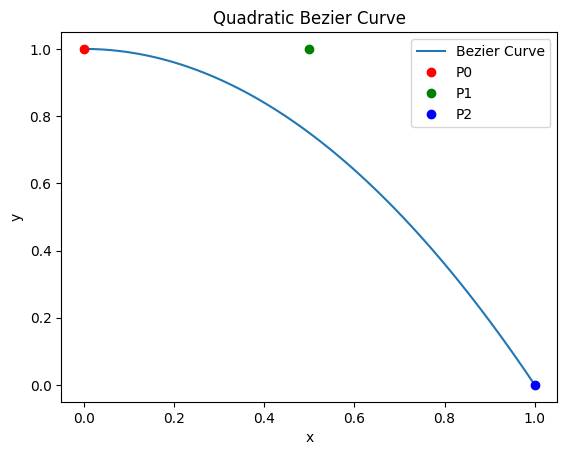

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(P0, P1, P2, num_points=100):
    t_values = np.linspace(0, 1, num_points)
    curve_points = []

    for t in t_values:
        x = (1 - t)**2 * P0[0] + 2 * (1 - t) * t * P1[0] + t**2 * P2[0]
        y = (1 - t)**2 * P0[1] + 2 * (1 - t) * t * P1[1] + t**2 * P2[1]
        curve_points.append((x, y))

    return np.array(curve_points)

# Example control points
P0 = (0, 1)
P1 = (0.5, 1)
P2 = (1, 0)

# Generate the Bezier curve points
curve_points = bezier_curve(P0, P1, P2)

# Plot the curve and control points
plt.plot(curve_points[:, 0], curve_points[:, 1], label='Bezier Curve')
plt.plot(*P0, 'ro', label='P0')
plt.plot(*P1, 'go', label='P1')
plt.plot(*P2, 'bo', label='P2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Quadratic Bezier Curve')
plt.show()


In [8]:
def generate_hsv_curve(h: float, s: float, b: float, n: int) -> list[tuple[float, float, float]]:
    """
    Generate a list of HSV colors along a bezier curve from the brightest to the darkest point.
    
    Parameters:
    h (float): Hue value.
    s (float): Saturation value.
    b (float): Brightness value.
    n (int): Number of colors to generate.
    
    Returns:
    list of tuple: List of HSV colors.
    """
    points = bezier_curve((0,1), (s,b), (1,b/2), num_points=n+1)
    
    # Generate the list of HSV colors
    hsv_colors = [(h, s_, b_) for s_, b_ in points[1:]]
    return hsv_colors

In [9]:
hsvs = [
	(355, 0.99, 0.81), # red
	(31, 0.94, 0.99), # orange
	(50, 0.94, 0.94), # yellow
	(115, 0.90, 0.72), # green
	(212, 0.99, 0.84), # blue
	(249, 0.75, 0.81), # indigo
	(258, 0.60, 0.91), # violet
	(25, 0.88, 0.47), # brown
	(70, 0.81, 0.78), # lime
	(178, 0.99, 0.84), # cyan
	(194, 0.63, 0.92), # sky blue
	(215, 0.74, 0.55), # deep blue
	(272, 0.79, 0.89), # purple
	(343, 0.21, 0.97), # pink v1
	(329, 0.14, 0.99), # pink v2
	(328, 0.48, 0.97), # pink v3
	(313, 0.79, 0.97), # magenta v1
	(301, 0.71, 0.98), # magenta v1
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-wiki-curve.png')

color_list

Color swatch saved as colourblocks-wiki-curve.png


[[(355, 0.99, 0.81),
  (355, 0.15819444444444444, 0.9668402777777777),
  (355, 0.3027777777777778, 0.9306944444444445),
  (355, 0.43374999999999997, 0.8915624999999999),
  (355, 0.5511111111111111, 0.8494444444444446),
  (355, 0.6548611111111111, 0.804340277777778),
  (355, 0.745, 0.7562500000000001),
  (355, 0.8215277777777777, 0.7051736111111112),
  (355, 0.8844444444444444, 0.6511111111111112),
  (355, 0.93375, 0.5940625),
  (355, 0.9694444444444444, 0.5340277777777779),
  (355, 0.9915277777777778, 0.47100694444444446),
  (355, 1.0, 0.405)],
 [(31, 0.94, 0.99),
  (31, 0.15055555555555553, 0.9949652777777777),
  (31, 0.2888888888888889, 0.9831944444444446),
  (31, 0.415, 0.9646874999999999),
  (31, 0.528888888888889, 0.9394444444444445),
  (31, 0.6305555555555555, 0.9074652777777779),
  (31, 0.72, 0.86875),
  (31, 0.7972222222222222, 0.8232986111111111),
  (31, 0.8622222222222222, 0.7711111111111111),
  (31, 0.915, 0.7121875),
  (31, 0.9555555555555555, 0.6465277777777778),
  (31, 0.

In [10]:
hsvs = [
	(0, 1, 0.9), # red
	(27, 0.98, 0.98), # orange
	(60, 0.92, 1), # yellow
	(122, 0.88, 0.69), # green
	(223, 0.99, 0.87), # blue
	(265, 0.98, 0.51), # indigo
	(278, 0.94, 0.92), # violet
	(33, 1, 0.40), # brown
	(85, 0.8, 1), # lime
	(180, 1, 1), # cyan
	(209, 0.54, 0.99), # sky blue
	(241, 0.98, 0.45), # deep blue
	(286, 0.81, 0.61), # purple
	(330, 0.49, 1), # pink
	(323, 1, 0.76), # magenta
	(202, 0.03, 0.58), # grey
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='colourblocks-xkcd-curve.png')

color_list

Color swatch saved as colourblocks-xkcd-curve.png


[[(0, 1, 0.9),
  (0, 0.1597222222222222, 0.9809027777777777),
  (0, 0.3055555555555556, 0.9569444444444445),
  (0, 0.4375, 0.928125),
  (0, 0.5555555555555556, 0.8944444444444446),
  (0, 0.6597222222222222, 0.8559027777777779),
  (0, 0.75, 0.8125),
  (0, 0.8263888888888888, 0.7642361111111111),
  (0, 0.8888888888888888, 0.7111111111111111),
  (0, 0.9375, 0.653125),
  (0, 0.9722222222222222, 0.5902777777777779),
  (0, 0.9930555555555556, 0.5225694444444445),
  (0, 1.0, 0.45)],
 [(27, 0.98, 0.98),
  (27, 0.15666666666666665, 0.9934027777777776),
  (27, 0.30000000000000004, 0.9802777777777779),
  (27, 0.43, 0.960625),
  (27, 0.5466666666666666, 0.9344444444444445),
  (27, 0.6499999999999999, 0.9017361111111111),
  (27, 0.74, 0.8625),
  (27, 0.8166666666666667, 0.8167361111111112),
  (27, 0.88, 0.7644444444444445),
  (27, 0.9299999999999999, 0.705625),
  (27, 0.9666666666666667, 0.6402777777777778),
  (27, 0.99, 0.5684027777777778),
  (27, 1.0, 0.49)],
 [(60, 0.92, 1),
  (60, 0.1475, 0.996

In [29]:
hsvs = [
	(359, 0.79, 0.92), # red			0
	(7, 0.79, 0.88), # orangey red		5
	(18, 0.84, 0.92), # reddish orange	20
	(32, 0.96, 0.99), # orange			30
	(36, 0.90, 0.97), # amber?			35
	(49, 0.79, 0.99), # yellow			50
	(53, 0.84, 0.84), # yellow-lime		55
	(66, 0.87, 0.71), # lime			65
	(115, 0.70, 0.77), # green			115
	(176, 0.87, 0.56), # green-blue		175
	(216, 0.90, 0.84), # blue			215
	(228, 0.73, 0.70), # blue-indigo	230
	(255, 0.79, 0.61), # indigo			255
	(264, 0.69, 0.72), # violet			265
	(276, 0.73, 0.91), # purple			275
	(178, 0.89, 0.87), # cyan
	(312, 0.67, 0.99), # magenta		310
	(2, 0.37, 0.87), # pink
	(25, 0.86, 0.54), # brown
	(194, 0.58, 0.93), # sky blue
	(216, 0.95, 0.36), # deep blue
	(202, 0.01, 0.58), # grey
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=30, output_file='colourblocks-onscreen-curve2.png')

color_list = [[(h,s,v)] + generate_hsv_line(h, s, v, 9) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=30, output_file='colourblocks-onscreen-linear.png')


Color swatch saved as colourblocks-onscreen-curve2.png
Color swatch saved as colourblocks-onscreen-linear.png


In [12]:
hsvs = [
	(0, 0.98, 0.89), # red			0
	(15, 0.98, 0.89), # vermilion	15
	(29, 1, 1), # orange			30
	(46, 1, 1), # amber				45
	(58, 1, 1), # yellow			60
	(73, 0.94, 0.88), # chartreuse	75
	(120, 1, 0.8), # green			120
	(181, 1, 0.89), # teal			180
	(240, 1, 0.89), # blue			240
	(269, 0.98, 0.9), # purple		270
	(299, 0.98, 0.89), # violet		300
	(331, 0.96, 0.9), # magenta		330
	(203, 0.54, 0.46), # slate		205
	(28, 0.78, 0.38), # brown
	(59, 0.49, 0.4), # olive
]
n = 12     # Number of colors to generate

color_list = [[(h,s,v)] + generate_hsv_curve(h, s, v, n) for h, s, v in hsvs]

draw_color_swatch(color_list, square_size=20, output_file='ryb-mixing.png')

color_list

Color swatch saved as ryb-mixing.png


[[(0, 0.98, 0.89),
  (0, 0.15666666666666665, 0.9793402777777777),
  (0, 0.30000000000000004, 0.9540277777777779),
  (0, 0.43, 0.9240625),
  (0, 0.5466666666666666, 0.8894444444444445),
  (0, 0.6499999999999999, 0.8501736111111111),
  (0, 0.74, 0.80625),
  (0, 0.8166666666666667, 0.7576736111111113),
  (0, 0.88, 0.7044444444444444),
  (0, 0.9299999999999999, 0.6465624999999999),
  (0, 0.9666666666666667, 0.5840277777777778),
  (0, 0.99, 0.5168402777777777),
  (0, 1.0, 0.445)],
 [(15, 0.98, 0.89),
  (15, 0.15666666666666665, 0.9793402777777777),
  (15, 0.30000000000000004, 0.9540277777777779),
  (15, 0.43, 0.9240625),
  (15, 0.5466666666666666, 0.8894444444444445),
  (15, 0.6499999999999999, 0.8501736111111111),
  (15, 0.74, 0.80625),
  (15, 0.8166666666666667, 0.7576736111111113),
  (15, 0.88, 0.7044444444444444),
  (15, 0.9299999999999999, 0.6465624999999999),
  (15, 0.9666666666666667, 0.5840277777777778),
  (15, 0.99, 0.5168402777777777),
  (15, 1.0, 0.445)],
 [(29, 1, 1),
  (29, 0.

In [13]:
hues = [355, 0, 15, 30, 50, 60, 75, 120, 180, 200, 240, 270, 300, 330]

n = 12     # Number of colors to generate

color_list = []

for h in hues:
    color_list += [[(h,0.8,b)] + generate_hsv_curve(h, 0.8, b, n) for b in [1, 0.8, 0.6, 0.4]]

draw_color_swatch(color_list, square_size=20, output_file='experimental-curve.png')

color_list

Color swatch saved as experimental-curve.png


[[(355, 0.8, 1),
  (355, 0.12916666666666665, 0.9965277777777777),
  (355, 0.25, 0.9861111111111112),
  (355, 0.36250000000000004, 0.96875),
  (355, 0.46666666666666673, 0.9444444444444446),
  (355, 0.5625, 0.9131944444444445),
  (355, 0.65, 0.875),
  (355, 0.7291666666666666, 0.8298611111111112),
  (355, 0.8, 0.7777777777777778),
  (355, 0.8625, 0.71875),
  (355, 0.9166666666666666, 0.6527777777777779),
  (355, 0.9624999999999999, 0.5798611111111112),
  (355, 1.0, 0.5)],
 [(355, 0.8, 0.8),
  (355, 0.12916666666666665, 0.9652777777777777),
  (355, 0.25, 0.9277777777777778),
  (355, 0.36250000000000004, 0.8875000000000001),
  (355, 0.46666666666666673, 0.8444444444444446),
  (355, 0.5625, 0.7986111111111112),
  (355, 0.65, 0.75),
  (355, 0.7291666666666666, 0.6986111111111112),
  (355, 0.8, 0.6444444444444446),
  (355, 0.8625, 0.5875),
  (355, 0.9166666666666666, 0.5277777777777779),
  (355, 0.9624999999999999, 0.4652777777777778),
  (355, 1.0, 0.4)],
 [(355, 0.8, 0.6),
  (355, 0.129166

In [14]:
def luminance(r, g, b):
    # Normalize RGB to [0, 1]
    r = r / 255.0
    g = g / 255.0
    b = b / 255.0
    return (r * 0.2126) + (g * 0.7152) + (b * 0.0722)

def luminance_n(red, green, blue):
    return (red * 0.2126) + (green * 0.7152) + (blue * 0.0722)

lmap = dict()
for h in range(0, 360, 9):
    lmap[h] = (1 - luminance_n(*hsv_to_rgbn(h,1,1)))
    
lmap

{0: 0.7874,
 9: 0.68012,
 18: 0.57284,
 27: 0.46556,
 36: 0.35828000000000004,
 45: 0.251,
 54: 0.14372000000000007,
 63: 0.08283000000000007,
 72: 0.11472000000000004,
 81: 0.14661000000000013,
 90: 0.1785000000000001,
 99: 0.21039000000000008,
 108: 0.24228000000000005,
 117: 0.27417,
 126: 0.27758000000000005,
 135: 0.26675000000000004,
 144: 0.25592000000000004,
 153: 0.24509000000000003,
 162: 0.23426000000000002,
 171: 0.22343000000000002,
 180: 0.2126,
 189: 0.31987999999999994,
 198: 0.4271599999999999,
 207: 0.5344400000000002,
 216: 0.6417200000000001,
 225: 0.749,
 234: 0.8562799999999999,
 243: 0.91717,
 252: 0.88528,
 261: 0.8533900000000001,
 270: 0.8215,
 279: 0.7896099999999999,
 288: 0.75772,
 297: 0.72583,
 306: 0.72242,
 315: 0.73325,
 324: 0.7440800000000001,
 333: 0.75491,
 342: 0.76574,
 351: 0.77657}

In [15]:
luminances = list(range(0,255,25))
luminances

[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250]

In [16]:
def determine_brightness(h, s, target_luminance, tolerance=1e-5):
    v_min, v_max = 0.0, 1.0
    
    while v_max - v_min > tolerance:
        v_mid = (v_min + v_max) / 2
        r, g, b = hsv_to_rgbn(h, s, v_mid)
        current_luminance = luminance_n(r, g, b)
        
        if current_luminance < target_luminance:
            v_min = v_mid
        else:
            v_max = v_mid
    
    return v_mid

# Example usage
color_map = []
for h in range(0, 360, 9):
	for target_luminance in reversed(luminances):
		colors = []
		for s in range(10):
			s = (s+1)/10
			b = determine_brightness(h, s, target_luminance)
			colors.append((h,s,b))
		color_map.append(colors)

draw_color_swatch(color_map, square_size=20, output_file='test.png')

Color swatch saved as test.png


In [17]:
color_map

[[(0, 0.1, 0.9999923706054688),
  (0, 0.2, 0.9999923706054688),
  (0, 0.3, 0.9999923706054688),
  (0, 0.4, 0.9999923706054688),
  (0, 0.5, 0.9999923706054688),
  (0, 0.6, 0.9999923706054688),
  (0, 0.7, 0.9999923706054688),
  (0, 0.8, 0.9999923706054688),
  (0, 0.9, 0.9999923706054688),
  (0, 1.0, 0.9999923706054688)],
 [(0, 0.1, 0.9999923706054688),
  (0, 0.2, 0.9999923706054688),
  (0, 0.3, 0.9999923706054688),
  (0, 0.4, 0.9999923706054688),
  (0, 0.5, 0.9999923706054688),
  (0, 0.6, 0.9999923706054688),
  (0, 0.7, 0.9999923706054688),
  (0, 0.8, 0.9999923706054688),
  (0, 0.9, 0.9999923706054688),
  (0, 1.0, 0.9999923706054688)],
 [(0, 0.1, 0.9999923706054688),
  (0, 0.2, 0.9999923706054688),
  (0, 0.3, 0.9999923706054688),
  (0, 0.4, 0.9999923706054688),
  (0, 0.5, 0.9999923706054688),
  (0, 0.6, 0.9999923706054688),
  (0, 0.7, 0.9999923706054688),
  (0, 0.8, 0.9999923706054688),
  (0, 0.9, 0.9999923706054688),
  (0, 1.0, 0.9999923706054688)],
 [(0, 0.1, 0.9999923706054688),
  (0,

In [18]:
def hsl_to_rgbn(h, s, l):
    def f(n):
        k = (n + h / 30) % 12
        a = s * min(l, 1 - l)
        return l - a * max(-1, min(k - 3, 9 - k, 1))
    
    r = f(0)
    g = f(8)
    b = f(4)
    
    return r,g,b

def hsl_to_rgb(h, s, l):
    r,g,b = hsl_to_rgbn(h,s,l)
    return int(r * 255), int(g * 255), int(b * 255)

def determine_lightness(h, s, target_luminance, tolerance=1e-5):
    l_min, l_max = 0.0, 1.0
    
    while l_max - l_min > tolerance:
        l_mid = (l_min + l_max) / 2
        r, g, b = hsl_to_rgbn(h, s, l_mid)
        current_luminance = luminance_n(r, g, b)
        
        if current_luminance < target_luminance:
            l_min = l_mid
        else:
            l_max = l_mid
    
    return l_mid

def determine_saturation(h, l, target_luminance, tolerance=1e-5):
    s_min, s_max = 0.0, 1.0
    
    while s_max - s_min > tolerance:
        s_mid = (s_min + s_max) / 2
        r, g, b = hsl_to_rgb(h, s_mid, l)
        current_luminance = luminance(r, g, b)
        
        if current_luminance < target_luminance:
            s_min = s_mid
        else:
            s_max = s_mid
    
    return s_mid

def hsl_to_hsv(h, s, l):
    """
    Convert HSL to HSV.

    Parameters:
    h (float): Hue value (0 <= h < 360).
    s (float): Saturation value (0 <= s <= 1).
    l (float): Lightness value (0 <= l <= 1).

    Returns:
    tuple: (h, s_v, v) where 0 <= h < 360, 0 <= s_v <= 1, 0 <= v <= 1
    """
    v = l + s * min(l, 1 - l)
    if v == 0:
        s_v = 0
    else:
        s_v = 2 * (1 - l / v)

    return h, s_v, v

# Example usage
h, s, l = 120, 0.5, 0.4  # Given hue, saturation, and lightness in HSL
hsv_result = hsl_to_hsv(h, s, l)
print(f"HSV: {hsv_result}")


HSV: (120, 0.6666666666666667, 0.6000000000000001)


In [19]:

# Example usage
color_map = []
for h in range(0, 360, 9):
	for target_luminance in reversed(luminances[1:-2]):
		colors = []
		for s in range(10):
			s = (s+1)/10
			l = determine_lightness(h, s, target_luminance)
			colors.append(hsl_to_hsv(h,s,l))
		color_map.append(colors)

draw_color_swatch(color_map, square_size=20, output_file='test2.png')

Color swatch saved as test2.png


In [20]:
from scipy.interpolate import interp1d

def bezier_curve_even_y(P0, P1, P2, num_points=100):
    # Step 1: Generate a high-resolution Bezier curve
    t_values = np.linspace(0, 1, 1000)
    curve_points = []

    for t in t_values:
        x = (1 - t)**2 * P0[0] + 2 * (1 - t) * t * P1[0] + t**2 * P2[0]
        y = (1 - t)**2 * P0[1] + 2 * (1 - t) * t * P1[1] + t**2 * P2[1]
        curve_points.append((x, y))

    curve_points = np.array(curve_points)

    # Step 2: Sort the points by y-coordinate
    curve_points = curve_points[np.argsort(curve_points[:, 1])]

    # Step 3: Interpolate to get evenly spaced y values
    y_values = np.linspace(curve_points[0, 1], curve_points[-1, 1], num_points)
    x_interp = interp1d(curve_points[:, 1], curve_points[:, 0], kind='linear')
    evenly_spaced_curve_points = [(x_interp(y), y) for y in y_values]

    return np.array(evenly_spaced_curve_points)

In [ ]:
# 0		red
# 15	vermilion
# 30	orange
# 45	amber
# 60	yellow
# 90	lime/chartreuse
# 120	green
# 150	aquamarine
# 180	cyan
# 210	blue
# 240	indigo
# 270	violet
# 300	magenta
# 330	rose
# 345	


# (216, 0.90, 0.84), # blue			215
# (228, 0.73, 0.70), # blue-indigo	230
# (255, 0.79, 0.61), # indigo			255
# (264, 0.69, 0.72), # violet			265
# (276, 0.73, 0.91), # purple			275

In [93]:
all_mat = []
# for h in range(0, 360, 18):
# for h in [353, 19, 31, 40, 50, 58, 71, 109, 151, 162, 172, 182, 193, 202, 212, 266, 283, 305, 326, 340]:
for h in [0, 15, 30, 45, 55, 90, 120, 150, 180, 210, 240, 270, 300, 330, 345]: # 5
# for h in [0, 5, 20, 30, 35, 50, 55, 65, 115, 175, 180, 195, 215, 230, 255, 265, 275, 310]: # 4
# for h in [355, 20, 30, 40, 50, 60, 70, 110, 150, 160, 170, 180, 195, 200, 210, 265, 285, 305, 325, 340]: # 3
    mat = [[]]*9
    r,g,b = hsl_to_rgbn(h,1,0.5)
    # print(r,g,b)
    value = int(luminance_n(r,g,b)*10)
    
    points = bezier_curve_even_y((0,0),(1,value/10),(0,1),11)
    ranges = {int(y*10): int(x*10) for x,y in points[1:-1]}
    # print(ranges)
    for i,length in ranges.items():
        mat[i-1] = [hsl_to_hsv(h,s,determine_lightness(h,s,i/10.0)) for s in [(j+1)/length for j in range(length)]]
    all_mat += reversed(mat)
    # break
# print(all_mat)


draw_color_swatch(all_mat, square_size=20, output_file='test5.png')

Color swatch saved as test5.png


In [88]:
hues = [0, 15, 30, 45, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 345]
color_list = [[(h,1,1)] + generate_hsv_curve(h, 1, 1, n) for h in hues]

draw_color_swatch(color_list, square_size=30, output_file='16hues-curve.png')

Color swatch saved as 16hues-curve.png


In [37]:
import colorsys

def rgb_to_hsv(r, g, b):
    """
    Convert an RGB color to HSV.
    
    Parameters:
    - r, g, b (int): Red, Green, and Blue components of the color, in the range [0, 255].
    
    Returns:
    - h, s, v (float): Hue, Saturation, and Value components of the color.
    """
    # Normalize the RGB values to the range [0, 1] as expected by the colorsys function
    r_norm, g_norm, b_norm = r / 255.0, g / 255.0, b / 255.0

    # Use colorsys to convert the normalized RGB to HSV
    h, s, v = colorsys.rgb_to_hsv(r_norm, g_norm, b_norm)

    # Convert hue to degrees (0-360) instead of the default 0-1 range
    h = int(h * 360)

    return h, s, v

In [61]:
def scale_value(value, input_min=0, input_max=100, target_min=20, target_max=80):
    """
    Scale a value from one range to another.

    Parameters:
    - value (float): The input value to be scaled.
    - input_min (float): The minimum value of the input range.
    - input_max (float): The maximum value of the input range.
    - target_min (float): The minimum value of the target range.
    - target_max (float): The maximum value of the target range.

    Returns:
    - float: The scaled value in the target range.
    """
    # Compute the scaling factor
    scaled_value = target_min + ((value - input_min) / (input_max - input_min)) * (target_max - target_min)
    
    return scaled_value

# Example usage
original_value = 50  # Example value in the range 0-100
scaled_value = scale_value(original_value)
print(f"Original value {original_value} scaled to the range 20-80 is {scaled_value:.2f}")


Original value 50 scaled to the range 20-80 is 50.00


In [132]:
import numpy as np


# (359, 0.79, 0.92), # red			0
# (7, 0.79, 0.88), # orangey red		5
# (18, 0.84, 0.92), # reddish orange	20
# (32, 0.96, 0.99), # orange			30
# (36, 0.90, 0.97), # amber?			35
# (49, 0.79, 0.99), # yellow			50
# (53, 0.84, 0.84), # yellow-lime		55
# (66, 0.87, 0.71), # lime			65
# (115, 0.70, 0.77), # green			115
# (176, 0.87, 0.56), # green-blue		175
# (216, 0.90, 0.84), # blue			215
# (228, 0.73, 0.70), # blue-indigo	230
# (255, 0.79, 0.61), # indigo			255
# (264, 0.69, 0.72), # violet			265
# (276, 0.73, 0.91), # purple			275
# (178, 0.89, 0.87), # cyan
# (312, 0.67, 0.99), # magenta		310

# Given Munsell hues and corresponding HSV hue values
# munsell_hues = ['5R', '5YR', '5Y', '5GY', '5G', '5BG', '5B', '5PB', '5P', '5RP', '5Rb']
# hsv_hues = [-6, 37, 53, 71, 156, 172, 190, 206, 288, 319, 354]
munsell_hues = ['5R', '5YR', '5Y', '2.5GY', '10GY', '7.5BG', '5PB', '2.5P', '2.5RP', '5Rb']
hsv_hues = [-1, 32, 49, 66, 115, 178, 216, 276, 312, 359]

# All Munsell hues in order
all_munsell_hues = [
    '5R', '7.5R', '10R', '2.5YR', '5YR', '7.5YR', '10YR', '2.5Y', '5Y', '7.5Y', '10Y',
    '2.5GY', '5GY', '7.5GY', '10GY', '2.5G', '5G', '7.5G', '10G', '2.5BG', '5BG', '7.5BG', '10BG',
    '2.5B', '5B', '7.5B', '10B', '2.5PB', '5PB', '7.5PB', '10PB', '2.5P', '5P', '7.5P', '10P',
    '2.5RP', '5RP', '7.5RP', '10RP', '2.5R', '5Rb'
]

# Function to interpolate HSV hue values
def interpolate_hsv_hues(munsell_hues, hsv_hues, all_munsell_hues):
    interpolated_hues = {}
    n = len(munsell_hues)
    
    # Calculate HSV hue values for the known Munsell hues
    for i in range(n - 1):
        start_hue = hsv_hues[i]
        end_hue = hsv_hues[i + 1]
        start_index = all_munsell_hues.index(munsell_hues[i])
        end_index = all_munsell_hues.index(munsell_hues[i + 1])
        
        # Linear interpolation between the known hues
        for j in range(start_index, end_index + 1):
            fraction = (j - start_index) / (end_index - start_index)
            interpolated_value = (1 - fraction) * start_hue + fraction * end_hue
            interpolated_hues[all_munsell_hues[j]] = (360 + round(interpolated_value)) % 360
    
    return interpolated_hues

# Perform interpolation
interpolated_hues = interpolate_hsv_hues(munsell_hues, hsv_hues, all_munsell_hues)

# Print the results
# for hue in all_munsell_hues:
#     print(f"{hue}: {interpolated_hues[hue]}")
interpolated_hues

{'5R': 359,
 '7.5R': 7,
 '10R': 16,
 '2.5YR': 24,
 '5YR': 32,
 '7.5YR': 36,
 '10YR': 40,
 '2.5Y': 45,
 '5Y': 49,
 '7.5Y': 55,
 '10Y': 60,
 '2.5GY': 66,
 '5GY': 82,
 '7.5GY': 99,
 '10GY': 115,
 '2.5G': 124,
 '5G': 133,
 '7.5G': 142,
 '10G': 151,
 '2.5BG': 160,
 '5BG': 169,
 '7.5BG': 178,
 '10BG': 183,
 '2.5B': 189,
 '5B': 194,
 '7.5B': 200,
 '10B': 205,
 '2.5PB': 211,
 '5PB': 216,
 '7.5PB': 236,
 '10PB': 256,
 '2.5P': 276,
 '5P': 285,
 '7.5P': 294,
 '10P': 303,
 '2.5RP': 312,
 '5RP': 321,
 '7.5RP': 331,
 '10RP': 340,
 '2.5R': 350,
 '5Rb': 359}

In [133]:
munsel = { # hue_group, hue, value, chroma
            'RP': {
                '2.5': {
                    '1': {
                        '2': [0x136, 0x2b, 0x10],
                        '4': [0x135, 0x40, 0x12],
                        '6': [0x132, 0x53, 0x15]
                    },
                    '2': {
                        '2': [0x140, 0x1d, 0x18],
                        '4': [0x13d, 0x2c, 0x1b],
                        '6': [0x13c, 0x39, 0x1e],
                        '8': [0x139, 0x4a, 0x22],
                        '10': [0x137, 0x60, 0x25]
                    },
                    '3': {
                        '2': [0x147, 0x16, 0x22],
                        '4': [0x142, 0x25, 0x26],
                        '6': [0x140, 0x31, 0x29],
                        '8': [0x13f, 0x3d, 0x2d],
                        '10': [0x13d, 0x49, 0x31],
                        '12': [0x13a, 0x59, 0x34]
                    },
                    '4': {
                        '2': [0x148, 0x11, 0x2b],
                        '4': [0x145, 0x1c, 0x2f],
                        '6': [0x143, 0x27, 0x34],
                        '8': [0x142, 0x30, 0x38],
                        '10': [0x140, 0x39, 0x3b],
                        '12': [0x13f, 0x41, 0x3f],
                        '14': [0x13d, 0x4b, 0x42],
                        '16': [0x13b, 0x58, 0x46]
                    },
                    '5': {
                        '2': [0x14a, 0xb, 0x34],
                        '4': [0x146, 0x17, 0x39],
                        '6': [0x145, 0x20, 0x3e],
                        '8': [0x144, 0x29, 0x43],
                        '10': [0x143, 0x30, 0x46],
                        '12': [0x142, 0x37, 0x4a],
                        '14': [0x140, 0x3f, 0x4e],
                        '16': [0x13f, 0x46, 0x51],
                        '18': [0x13d, 0x4f, 0x55],
                        '20': [0x13b, 0x60, 0x59]
                    },
                    '6': {
                        '2': [0x14a, 0x9, 0x3f],
                        '4': [0x149, 0x13, 0x43],
                        '6': [0x147, 0x1b, 0x48],
                        '8': [0x146, 0x22, 0x4c],
                        '10': [0x145, 0x29, 0x51],
                        '12': [0x144, 0x30, 0x55],
                        '14': [0x143, 0x36, 0x59],
                        '16': [0x141, 0x3d, 0x5d],
                        '18': [0x140, 0x43, 0x61],
                        '20': [0x13e, 0x4b, 0x64],
                        '22': [0x13b, 0x53, 0x64]
                    },
                    '7': {
                        '2': [0x14e, 0x7, 0x48],
                        '4': [0x14a, 0x10, 0x4e],
                        '6': [0x149, 0x18, 0x53],
                        '8': [0x147, 0x1f, 0x58],
                        '10': [0x146, 0x25, 0x5c],
                        '12': [0x145, 0x2b, 0x61],
                        '14': [0x143, 0x30, 0x64],
                        '16': [0x13f, 0x34, 0x64],
                        '18': [0x13b, 0x3a, 0x64],
                        '20': [0x137, 0x40, 0x64]
                    },
                    '8': {
                        '2': [0x14e, 0x5, 0x52],
                        '4': [0x14a, 0xe, 0x58],
                        '6': [0x14b, 0x16, 0x5e],
                        '8': [0x149, 0x1d, 0x64],
                        '10': [0x143, 0x20, 0x64],
                        '12': [0x13d, 0x23, 0x64],
                        '14': [0x138, 0x27, 0x64]
                    },
                    '9': {
                        '2': [0x14c, 0x5, 0x5d],
                        '4': [0x14c, 0xd, 0x64],
                        '6': [0x140, 0x10, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x13e, 0x2f, 0x10],
                        '4': [0x13d, 0x44, 0x13],
                        '6': [0x139, 0x57, 0x15]
                    },
                    '2': {
                        '2': [0x14a, 0x1f, 0x19],
                        '4': [0x147, 0x2f, 0x1c],
                        '6': [0x144, 0x3c, 0x1f],
                        '8': [0x141, 0x4e, 0x23]
                    },
                    '3': {
                        '2': [0x14f, 0x18, 0x22],
                        '4': [0x14d, 0x28, 0x27],
                        '6': [0x14b, 0x35, 0x2b],
                        '8': [0x148, 0x40, 0x2f],
                        '10': [0x145, 0x4e, 0x33]
                    },
                    '4': {
                        '2': [0x154, 0x12, 0x2c],
                        '4': [0x150, 0x1f, 0x31],
                        '6': [0x14e, 0x2a, 0x36],
                        '8': [0x14d, 0x34, 0x3a],
                        '10': [0x14a, 0x3c, 0x3d],
                        '12': [0x148, 0x46, 0x42],
                        '14': [0x146, 0x50, 0x45]
                    },
                    '5': {
                        '2': [0x155, 0xd, 0x35],
                        '4': [0x152, 0x19, 0x3b],
                        '6': [0x151, 0x23, 0x40],
                        '8': [0x14f, 0x2c, 0x45],
                        '10': [0x14e, 0x34, 0x49],
                        '12': [0x14c, 0x3b, 0x4e],
                        '14': [0x14a, 0x43, 0x52],
                        '16': [0x148, 0x4b, 0x56],
                        '18': [0x146, 0x57, 0x5a]
                    },
                    '6': {
                        '2': [0x155, 0xb, 0x3f],
                        '4': [0x154, 0x15, 0x45],
                        '6': [0x152, 0x1e, 0x4a],
                        '8': [0x151, 0x25, 0x4f],
                        '10': [0x150, 0x2c, 0x53],
                        '12': [0x14e, 0x33, 0x58],
                        '14': [0x14d, 0x39, 0x5d],
                        '16': [0x14b, 0x40, 0x61],
                        '18': [0x149, 0x47, 0x64],
                        '20': [0x144, 0x51, 0x64],
                        '22': [0x13f, 0x62, 0x64]
                    },
                    '7': {
                        '2': [0x156, 0x9, 0x49],
                        '4': [0x155, 0x11, 0x4f],
                        '6': [0x153, 0x1b, 0x55],
                        '8': [0x153, 0x22, 0x5a],
                        '10': [0x151, 0x28, 0x5f],
                        '12': [0x14f, 0x2e, 0x64],
                        '14': [0x14c, 0x32, 0x64],
                        '16': [0x148, 0x37, 0x64],
                        '18': [0x144, 0x3c, 0x64]
                    },
                    '8': {
                        '2': [0x156, 0x6, 0x53],
                        '4': [0x157, 0xf, 0x59],
                        '6': [0x155, 0x18, 0x60],
                        '8': [0x152, 0x1e, 0x64],
                        '10': [0x14d, 0x20, 0x64],
                        '12': [0x148, 0x25, 0x64]
                    },
                    '9': {
                        '2': [0x156, 0x5, 0x5e],
                        '4': [0x154, 0xe, 0x64],
                        '6': [0x14c, 0x10, 0x64]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0x145, 0x30, 0x10],
                        '4': [0x141, 0x46, 0x14],
                        '6': [0x13f, 0x5d, 0x17]
                    },
                    '2': {
                        '2': [0x150, 0x1f, 0x19],
                        '4': [0x14d, 0x30, 0x1d],
                        '6': [0x14a, 0x3e, 0x20],
                        '8': [0x146, 0x50, 0x24]
                    },
                    '3': {
                        '2': [0x156, 0x1a, 0x23],
                        '4': [0x153, 0x2a, 0x28],
                        '6': [0x151, 0x36, 0x2c],
                        '8': [0x14f, 0x43, 0x31],
                        '10': [0x14b, 0x50, 0x35]
                    },
                    '4': {
                        '2': [0x158, 0x14, 0x2c],
                        '4': [0x157, 0x21, 0x32],
                        '6': [0x155, 0x2c, 0x37],
                        '8': [0x154, 0x36, 0x3c],
                        '10': [0x152, 0x3e, 0x3f],
                        '12': [0x14f, 0x48, 0x43],
                        '14': [0x14c, 0x54, 0x48]
                    },
                    '5': {
                        '2': [0x15c, 0xe, 0x36],
                        '4': [0x15a, 0x1a, 0x3c],
                        '6': [0x158, 0x25, 0x41],
                        '8': [0x156, 0x2e, 0x46],
                        '10': [0x155, 0x35, 0x4b],
                        '12': [0x152, 0x3e, 0x50],
                        '14': [0x150, 0x45, 0x53],
                        '16': [0x14e, 0x4e, 0x58],
                        '18': [0x14a, 0x5c, 0x5c]
                    },
                    '6': {
                        '2': [0x15b, 0xb, 0x3f],
                        '4': [0x15b, 0x15, 0x45],
                        '6': [0x15a, 0x1f, 0x4c],
                        '8': [0x159, 0x26, 0x50],
                        '10': [0x157, 0x2e, 0x55],
                        '12': [0x155, 0x34, 0x5a],
                        '14': [0x153, 0x3b, 0x5f],
                        '16': [0x151, 0x43, 0x64],
                        '18': [0x14e, 0x49, 0x64],
                        '20': [0x149, 0x54, 0x64]
                    },
                    '7': {
                        '2': [0x15d, 0x9, 0x4a],
                        '4': [0x15c, 0x12, 0x50],
                        '6': [0x15b, 0x1b, 0x56],
                        '8': [0x159, 0x23, 0x5c],
                        '10': [0x158, 0x29, 0x61],
                        '12': [0x156, 0x2f, 0x64],
                        '14': [0x152, 0x33, 0x64],
                        '16': [0x14e, 0x38, 0x64]
                    },
                    '8': {
                        '2': [0x15c, 0x7, 0x53],
                        '4': [0x15d, 0x11, 0x5a],
                        '6': [0x15b, 0x19, 0x61],
                        '8': [0x157, 0x1e, 0x64],
                        '10': [0x154, 0x21, 0x64],
                        '12': [0x150, 0x25, 0x64]
                    },
                    '9': {
                        '2': [0x15f, 0x6, 0x5e],
                        '4': [0x15c, 0xe, 0x64],
                        '6': [0x154, 0x11, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x14c, 0x32, 0x11],
                        '4': [0x148, 0x47, 0x14],
                        '6': [0x144, 0x5f, 0x17]
                    },
                    '2': {
                        '2': [0x156, 0x20, 0x19],
                        '4': [0x152, 0x33, 0x1d],
                        '6': [0x150, 0x40, 0x21],
                        '8': [0x14b, 0x53, 0x25]
                    },
                    '3': {
                        '2': [0x15e, 0x1b, 0x23],
                        '4': [0x15a, 0x2b, 0x28],
                        '6': [0x159, 0x38, 0x2d],
                        '8': [0x155, 0x44, 0x32],
                        '10': [0x151, 0x53, 0x36]
                    },
                    '4': {
                        '2': [0x15e, 0x14, 0x2d],
                        '4': [0x15e, 0x22, 0x32],
                        '6': [0x15c, 0x2d, 0x37],
                        '8': [0x15a, 0x37, 0x3c],
                        '10': [0x157, 0x40, 0x41],
                        '12': [0x154, 0x4a, 0x45],
                        '14': [0x151, 0x57, 0x49]
                    },
                    '5': {
                        '2': [0x162, 0xf, 0x36],
                        '4': [0x161, 0x1b, 0x3c],
                        '6': [0x15e, 0x25, 0x42],
                        '8': [0x15d, 0x2e, 0x47],
                        '10': [0x15b, 0x36, 0x4c],
                        '12': [0x159, 0x3f, 0x51],
                        '14': [0x156, 0x46, 0x55],
                        '16': [0x154, 0x50, 0x5a]
                    },
                    '6': {
                        '2': [0x162, 0xc, 0x40],
                        '4': [0x160, 0x17, 0x46],
                        '6': [0x160, 0x20, 0x4c],
                        '8': [0x15f, 0x27, 0x51],
                        '10': [0x15d, 0x2f, 0x57],
                        '12': [0x15c, 0x36, 0x5c],
                        '14': [0x15a, 0x3c, 0x60],
                        '16': [0x158, 0x43, 0x64],
                        '18': [0x154, 0x4a, 0x64]
                    },
                    '7': {
                        '2': [0x164, 0xa, 0x4a],
                        '4': [0x162, 0x13, 0x50],
                        '6': [0x161, 0x1c, 0x57],
                        '8': [0x160, 0x24, 0x5d],
                        '10': [0x15f, 0x2a, 0x62],
                        '12': [0x15c, 0x2f, 0x64],
                        '14': [0x159, 0x33, 0x64],
                        '16': [0x157, 0x38, 0x64]
                    },
                    '8': {
                        '2': [0x160, 0x7, 0x54],
                        '4': [0x163, 0x11, 0x5b],
                        '6': [0x161, 0x1a, 0x62],
                        '8': [0x15f, 0x1e, 0x64],
                        '10': [0x15d, 0x21, 0x64]
                    },
                    '9': {
                        '2': [0x164, 0x6, 0x5e],
                        '4': [0x163, 0xe, 0x64],
                        '6': [0x15f, 0x11, 0x64]
                    }
                },
            },
            'R': {
                '2.5': {
                    '1': {
                        '2': [0x153, 0x33, 0x11],
                        '4': [0x14e, 0x4a, 0x15],
                        '6': [0x149, 0x64, 0x18]
                    },
                    '2': {
                        '2': [0x15d, 0x21, 0x19],
                        '4': [0x159, 0x33, 0x1e],
                        '6': [0x156, 0x42, 0x22],
                        '8': [0x151, 0x55, 0x26]
                    },
                    '3': {
                        '2': [0x163, 0x1b, 0x23],
                        '4': [0x161, 0x2c, 0x29],
                        '6': [0x15e, 0x38, 0x2d],
                        '8': [0x15c, 0x45, 0x32],
                        '10': [0x157, 0x53, 0x37]
                    },
                    '4': {
                        '2': [0x163, 0x14, 0x2d],
                        '4': [0x164, 0x22, 0x32],
                        '6': [0x162, 0x2d, 0x38],
                        '8': [0x15f, 0x37, 0x3d],
                        '10': [0x15e, 0x40, 0x41],
                        '12': [0x15b, 0x4a, 0x46],
                        '14': [0x156, 0x58, 0x4a]
                    },
                    '5': {
                        '2': [0x165, 0xf, 0x36],
                        '4': [0x165, 0x1c, 0x3d],
                        '6': [0x164, 0x26, 0x43],
                        '8': [0x163, 0x2f, 0x48],
                        '10': [0x161, 0x37, 0x4d],
                        '12': [0x15f, 0x3f, 0x52],
                        '14': [0x15c, 0x46, 0x56],
                        '16': [0x159, 0x50, 0x5a]
                    },
                    '6': {
                        '2': [0x0, 0xc, 0x40],
                        '4': [0x166, 0x18, 0x47],
                        '6': [0x166, 0x21, 0x4d],
                        '8': [0x165, 0x28, 0x52],
                        '10': [0x164, 0x30, 0x58],
                        '12': [0x162, 0x37, 0x5d],
                        '14': [0x160, 0x3d, 0x61],
                        '16': [0x15d, 0x43, 0x64],
                        '18': [0x15a, 0x4a, 0x64]
                    },
                    '7': {
                        '2': [0x0, 0xa, 0x4a],
                        '4': [0x0, 0x14, 0x51],
                        '6': [0x166, 0x1d, 0x57],
                        '8': [0x165, 0x25, 0x5e],
                        '10': [0x164, 0x2b, 0x63],
                        '12': [0x163, 0x2f, 0x64],
                        '14': [0x161, 0x33, 0x64],
                        '16': [0x15e, 0x38, 0x64]
                    },
                    '8': {
                        '2': [0x0, 0x7, 0x54],
                        '4': [0x1, 0x13, 0x5c],
                        '6': [0x0, 0x1a, 0x63],
                        '8': [0x166, 0x1e, 0x64],
                        '10': [0x165, 0x21, 0x64]
                    },
                    '9': {
                        '2': [0x0, 0x6, 0x5e],
                        '4': [0x0, 0xe, 0x64],
                        '6': [0x1, 0x11, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x15a, 0x33, 0x11],
                        '4': [0x154, 0x4a, 0x15]
                    },
                    '2': {
                        '2': [0x162, 0x21, 0x19],
                        '4': [0x15f, 0x34, 0x1e],
                        '6': [0x15c, 0x43, 0x22],
                        '8': [0x157, 0x55, 0x26]
                    },
                    '3': {
                        '2': [0x0, 0x1c, 0x24],
                        '4': [0x166, 0x2c, 0x29],
                        '6': [0x166, 0x37, 0x2e],
                        '8': [0x163, 0x44, 0x32],
                        '10': [0x15e, 0x52, 0x37]
                    },
                    '4': {
                        '2': [0x2, 0x16, 0x2d],
                        '4': [0x2, 0x24, 0x33],
                        '6': [0x0, 0x2e, 0x38],
                        '8': [0x0, 0x37, 0x3d],
                        '10': [0x165, 0x40, 0x41],
                        '12': [0x163, 0x49, 0x46],
                        '14': [0x15e, 0x56, 0x4a]
                    },
                    '5': {
                        '2': [0x2, 0x10, 0x36],
                        '4': [0x3, 0x1e, 0x3d],
                        '6': [0x2, 0x28, 0x43],
                        '8': [0x1, 0x30, 0x48],
                        '10': [0x0, 0x38, 0x4d],
                        '12': [0x166, 0x3f, 0x52],
                        '14': [0x164, 0x46, 0x56],
                        '16': [0x161, 0x4f, 0x5a],
                        '18': [0x15a, 0x60, 0x5f]
                    },
                    '6': {
                        '2': [0x2, 0xd, 0x41],
                        '4': [0x3, 0x1a, 0x47],
                        '6': [0x4, 0x24, 0x4e],
                        '8': [0x2, 0x2a, 0x53],
                        '10': [0x2, 0x32, 0x58],
                        '12': [0x0, 0x37, 0x5d],
                        '14': [0x167, 0x3d, 0x62],
                        '16': [0x165, 0x43, 0x64],
                        '18': [0x162, 0x49, 0x64]
                    },
                    '7': {
                        '2': [0x5, 0xb, 0x4b],
                        '4': [0x5, 0x16, 0x51],
                        '6': [0x4, 0x20, 0x58],
                        '8': [0x3, 0x27, 0x5e],
                        '10': [0x2, 0x2d, 0x64],
                        '12': [0x1, 0x31, 0x64],
                        '14': [0x0, 0x34, 0x64]
                    },
                    '8': {
                        '2': [0x5, 0x9, 0x54],
                        '4': [0x6, 0x15, 0x5c],
                        '6': [0x4, 0x1d, 0x63],
                        '8': [0x4, 0x21, 0x64],
                        '10': [0x5, 0x24, 0x64]
                    },
                    '9': {
                        '2': [0x8, 0x8, 0x5f],
                        '4': [0x7, 0x10, 0x64],
                        '6': [0x9, 0x14, 0x64]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0x160, 0x34, 0x12],
                        '4': [0x15b, 0x4b, 0x15]
                    },
                    '2': {
                        '2': [0x0, 0x21, 0x19],
                        '4': [0x165, 0x34, 0x1e],
                        '6': [0x163, 0x41, 0x22],
                        '8': [0x15e, 0x53, 0x26]
                    },
                    '3': {
                        '2': [0x4, 0x1e, 0x24],
                        '4': [0x5, 0x30, 0x29],
                        '6': [0x4, 0x3b, 0x2e],
                        '8': [0x2, 0x45, 0x32],
                        '10': [0x167, 0x4f, 0x36]
                    },
                    '4': {
                        '2': [0x4, 0x17, 0x2d],
                        '4': [0x5, 0x27, 0x33],
                        '6': [0x5, 0x33, 0x38],
                        '8': [0x5, 0x3d, 0x3d],
                        '10': [0x4, 0x44, 0x41],
                        '12': [0x3, 0x4b, 0x45],
                        '14': [0x0, 0x52, 0x49]
                    },
                    '5': {
                        '2': [0x7, 0x11, 0x36],
                        '4': [0x8, 0x21, 0x3d],
                        '6': [0x7, 0x2c, 0x43],
                        '8': [0x7, 0x36, 0x48],
                        '10': [0x6, 0x3e, 0x4d],
                        '12': [0x6, 0x45, 0x52],
                        '14': [0x5, 0x4b, 0x56],
                        '16': [0x3, 0x51, 0x5a],
                        '18': [0x0, 0x57, 0x5e]
                    },
                    '6': {
                        '2': [0x8, 0x10, 0x41],
                        '4': [0x8, 0x1d, 0x48],
                        '6': [0x8, 0x27, 0x4e],
                        '8': [0x8, 0x2f, 0x53],
                        '10': [0x8, 0x37, 0x59],
                        '12': [0x8, 0x3e, 0x5d],
                        '14': [0x7, 0x45, 0x62],
                        '16': [0x7, 0x4a, 0x64],
                        '18': [0x7, 0x50, 0x64]
                    },
                    '7': {
                        '2': [0x9, 0xd, 0x4b],
                        '4': [0x9, 0x1a, 0x52],
                        '6': [0x9, 0x23, 0x58],
                        '8': [0x9, 0x2c, 0x5f],
                        '10': [0x9, 0x33, 0x64],
                        '12': [0xa, 0x38, 0x64],
                        '14': [0xa, 0x3c, 0x64],
                        '16': [0xa, 0x41, 0x64]
                    },
                    '8': {
                        '2': [0xa, 0xa, 0x55],
                        '4': [0x9, 0x17, 0x5d],
                        '6': [0xa, 0x20, 0x64],
                        '8': [0xc, 0x26, 0x64],
                        '10': [0xd, 0x2a, 0x64]
                    },
                    '9': {
                        '2': [0x9, 0x9, 0x60],
                        '4': [0xd, 0x12, 0x64],
                        '6': [0x10, 0x17, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x165, 0x34, 0x12],
                        '4': [0x162, 0x4b, 0x15]
                    },
                    '2': {
                        '2': [0x4, 0x24, 0x19],
                        '4': [0x5, 0x38, 0x1e],
                        '6': [0x4, 0x46, 0x22],
                        '8': [0x0, 0x51, 0x26]
                    },
                    '3': {
                        '2': [0xa, 0x1f, 0x23],
                        '4': [0xa, 0x32, 0x29],
                        '6': [0xa, 0x40, 0x2d],
                        '8': [0x9, 0x4c, 0x32],
                        '10': [0x8, 0x57, 0x35]
                    },
                    '4': {
                        '2': [0xb, 0x19, 0x2d],
                        '4': [0xc, 0x2b, 0x33],
                        '6': [0xc, 0x38, 0x38],
                        '8': [0xd, 0x43, 0x3d],
                        '10': [0xd, 0x4e, 0x41],
                        '12': [0xe, 0x59, 0x44]
                    },
                    '5': {
                        '2': [0xc, 0x14, 0x37],
                        '4': [0xd, 0x24, 0x3d],
                        '6': [0xd, 0x32, 0x43],
                        '8': [0xe, 0x3c, 0x48],
                        '10': [0xf, 0x46, 0x4c],
                        '12': [0xf, 0x50, 0x51],
                        '14': [0x11, 0x5b, 0x54]
                    },
                    '6': {
                        '2': [0xc, 0x11, 0x41],
                        '4': [0xe, 0x20, 0x48],
                        '6': [0xe, 0x2b, 0x4e],
                        '8': [0xe, 0x35, 0x53],
                        '10': [0xf, 0x3f, 0x58],
                        '12': [0x10, 0x47, 0x5c],
                        '14': [0x11, 0x50, 0x60],
                        '16': [0x13, 0x5c, 0x64]
                    },
                    '7': {
                        '2': [0xe, 0xf, 0x4b],
                        '4': [0xe, 0x1c, 0x52],
                        '6': [0xf, 0x27, 0x59],
                        '8': [0xf, 0x31, 0x5e],
                        '10': [0xf, 0x39, 0x63],
                        '12': [0x11, 0x40, 0x64],
                        '14': [0x13, 0x47, 0x64],
                        '16': [0x15, 0x50, 0x64]
                    },
                    '8': {
                        '2': [0xd, 0xb, 0x55],
                        '4': [0xf, 0x1a, 0x5d],
                        '6': [0xf, 0x24, 0x64],
                        '8': [0x12, 0x2a, 0x64],
                        '10': [0x14, 0x30, 0x64]
                    },
                    '9': {
                        '2': [0xd, 0xa, 0x60],
                        '4': [0x12, 0x15, 0x64],
                        '6': [0x17, 0x1b, 0x64]
                    }
                }
            },
            'YR': {
                '2.5': {
                    '1': {
                        '2': [0x7, 0x37, 0x11],
                        '4': [0x6, 0x52, 0x15],
                        '6': [0x0, 0x60, 0x19]
                    },
                    '2': {
                        '2': [0xd, 0x27, 0x19],
                        '4': [0xc, 0x3e, 0x1e],
                        '6': [0xd, 0x50, 0x22]
                    },
                    '3': {
                        '2': [0xf, 0x23, 0x23],
                        '4': [0x10, 0x36, 0x28],
                        '6': [0x11, 0x47, 0x2c],
                        '8': [0x13, 0x58, 0x30]
                    },
                    '4': {
                        '2': [0x10, 0x1c, 0x2d],
                        '4': [0x11, 0x2e, 0x32],
                        '6': [0x12, 0x3d, 0x37],
                        '8': [0x13, 0x4b, 0x3b],
                        '10': [0x17, 0x5a, 0x3e]
                    },
                    '5': {
                        '2': [0x10, 0x16, 0x37],
                        '4': [0x11, 0x27, 0x3d],
                        '6': [0x13, 0x35, 0x42],
                        '8': [0x14, 0x42, 0x47],
                        '10': [0x16, 0x4e, 0x4a],
                        '12': [0x19, 0x5c, 0x4e]
                    },
                    '6': {
                        '2': [0x11, 0x14, 0x41],
                        '4': [0x13, 0x22, 0x47],
                        '6': [0x13, 0x2f, 0x4d],
                        '8': [0x14, 0x3a, 0x52],
                        '10': [0x15, 0x44, 0x56],
                        '12': [0x17, 0x4f, 0x5a],
                        '14': [0x1b, 0x5f, 0x5d]
                    },
                    '7': {
                        '2': [0x12, 0x10, 0x4b],
                        '4': [0x13, 0x1e, 0x52],
                        '6': [0x14, 0x2b, 0x58],
                        '8': [0x14, 0x35, 0x5d],
                        '10': [0x15, 0x3e, 0x62],
                        '12': [0x17, 0x47, 0x64],
                        '14': [0x1b, 0x52, 0x64]
                    },
                    '8': {
                        '2': [0x12, 0xd, 0x55],
                        '4': [0x14, 0x1c, 0x5d],
                        '6': [0x14, 0x27, 0x63],
                        '8': [0x17, 0x2f, 0x64],
                        '10': [0x1a, 0x36, 0x64],
                        '12': [0x1c, 0x3e, 0x64]
                    },
                    '9': {
                        '2': [0x12, 0xc, 0x60],
                        '4': [0x18, 0x17, 0x64],
                        '6': [0x1d, 0x1f, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x11, 0x3f, 0x11]
                    },
                    '2': {
                        '2': [0x11, 0x2a, 0x19],
                        '4': [0x14, 0x45, 0x1d],
                        '6': [0x19, 0x62, 0x20]
                    },
                    '3': {
                        '2': [0x14, 0x23, 0x22],
                        '4': [0x16, 0x3a, 0x27],
                        '6': [0x18, 0x4d, 0x2b]
                    },
                    '4': {
                        '2': [0x16, 0x1e, 0x2d],
                        '4': [0x16, 0x32, 0x32],
                        '6': [0x18, 0x41, 0x36],
                        '8': [0x1a, 0x51, 0x39]
                    },
                    '5': {
                        '2': [0x16, 0x18, 0x36],
                        '4': [0x18, 0x2a, 0x3c],
                        '6': [0x18, 0x39, 0x41],
                        '8': [0x1a, 0x47, 0x45],
                        '10': [0x1d, 0x56, 0x48]
                    },
                    '6': {
                        '2': [0x17, 0x15, 0x41],
                        '4': [0x18, 0x25, 0x46],
                        '6': [0x19, 0x33, 0x4c],
                        '8': [0x1a, 0x3f, 0x50],
                        '10': [0x1b, 0x4b, 0x53],
                        '12': [0x1f, 0x5a, 0x56]
                    },
                    '7': {
                        '2': [0x16, 0x12, 0x4b],
                        '4': [0x18, 0x21, 0x51],
                        '6': [0x19, 0x2d, 0x57],
                        '8': [0x1a, 0x38, 0x5b],
                        '10': [0x1b, 0x43, 0x5f],
                        '12': [0x1d, 0x4f, 0x63]
                    },
                    '8': {
                        '2': [0x18, 0xf, 0x55],
                        '4': [0x18, 0x1e, 0x5c],
                        '6': [0x19, 0x2a, 0x62],
                        '8': [0x1c, 0x33, 0x64],
                        '10': [0x1f, 0x3c, 0x64],
                        '12': [0x22, 0x45, 0x64],
                        '14': [0x25, 0x53, 0x64]
                    },
                    '9': {
                        '2': [0x19, 0xe, 0x60],
                        '4': [0x1e, 0x1a, 0x64],
                        '6': [0x22, 0x22, 0x64]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0x17, 0x45, 0x10]
                    },
                    '2': {
                        '2': [0x17, 0x2c, 0x18],
                        '4': [0x1b, 0x4b, 0x1c]
                    },
                    '3': {
                        '2': [0x19, 0x25, 0x22],
                        '4': [0x1c, 0x3d, 0x26],
                        '6': [0x1f, 0x53, 0x29]
                    },
                    '4': {
                        '2': [0x18, 0x1f, 0x2c],
                        '4': [0x1b, 0x35, 0x31],
                        '6': [0x1e, 0x46, 0x34],
                        '8': [0x21, 0x59, 0x36]
                    },
                    '5': {
                        '2': [0x19, 0x19, 0x36],
                        '4': [0x1b, 0x2c, 0x3b],
                        '6': [0x1e, 0x3d, 0x3f],
                        '8': [0x1f, 0x4d, 0x43]
                    },
                    '6': {
                        '2': [0x1b, 0x16, 0x41],
                        '4': [0x1b, 0x26, 0x46],
                        '6': [0x1d, 0x35, 0x4a],
                        '8': [0x1f, 0x43, 0x4e],
                        '10': [0x22, 0x52, 0x51]
                    },
                    '7': {
                        '2': [0x1b, 0x13, 0x4b],
                        '4': [0x1d, 0x22, 0x50],
                        '6': [0x1e, 0x30, 0x55],
                        '8': [0x1f, 0x3b, 0x59],
                        '10': [0x21, 0x48, 0x5c],
                        '12': [0x24, 0x58, 0x5f]
                    },
                    '8': {
                        '2': [0x1d, 0x10, 0x55],
                        '4': [0x1e, 0x1f, 0x5b],
                        '6': [0x1e, 0x2b, 0x60],
                        '8': [0x1f, 0x37, 0x64],
                        '10': [0x22, 0x40, 0x64],
                        '12': [0x25, 0x4c, 0x64]
                    },
                    '9': {
                        '2': [0x1d, 0x10, 0x60],
                        '4': [0x21, 0x1c, 0x64],
                        '6': [0x26, 0x25, 0x64],
                        '8': [0x28, 0x2e, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x1e, 0x4b, 0x10]
                    },
                    '2': {
                        '2': [0x1e, 0x2d, 0x17],
                        '4': [0x22, 0x51, 0x1b]
                    },
                    '3': {
                        '2': [0x1e, 0x24, 0x21],
                        '4': [0x21, 0x3e, 0x24],
                        '6': [0x25, 0x5c, 0x27]
                    },
                    '4': {
                        '2': [0x20, 0x1f, 0x2b],
                        '4': [0x21, 0x37, 0x2f],
                        '6': [0x23, 0x4a, 0x32]
                    },
                    '5': {
                        '2': [0x1f, 0x1a, 0x35],
                        '4': [0x21, 0x2e, 0x3a],
                        '6': [0x23, 0x40, 0x3d],
                        '8': [0x25, 0x53, 0x40]
                    },
                    '6': {
                        '2': [0x22, 0x16, 0x3f],
                        '4': [0x22, 0x28, 0x44],
                        '6': [0x23, 0x38, 0x48],
                        '8': [0x25, 0x47, 0x4b],
                        '10': [0x28, 0x5b, 0x4d]
                    },
                    '7': {
                        '2': [0x21, 0x14, 0x4a],
                        '4': [0x22, 0x24, 0x4f],
                        '6': [0x23, 0x32, 0x53],
                        '8': [0x24, 0x3f, 0x56],
                        '10': [0x26, 0x4d, 0x59]
                    },
                    '8': {
                        '2': [0x23, 0x12, 0x54],
                        '4': [0x23, 0x20, 0x59],
                        '6': [0x24, 0x2d, 0x5d],
                        '8': [0x25, 0x3a, 0x61],
                        '10': [0x26, 0x45, 0x64],
                        '12': [0x29, 0x54, 0x64]
                    },
                    '9': {
                        '2': [0x23, 0x11, 0x5f],
                        '4': [0x25, 0x1e, 0x64],
                        '6': [0x29, 0x28, 0x64],
                        '8': [0x2c, 0x32, 0x64]
                    }
                }
            },
            'Y': {
                '2.5': {
                    '1': {
                        '2': [0x26, 0x51, 0xe]
                    },
                    '2': {
                        '2': [0x24, 0x2c, 0x16],
                        '4': [0x28, 0x59, 0x19]
                    },
                    '3': {
                        '2': [0x26, 0x24, 0x20],
                        '4': [0x27, 0x41, 0x23]
                    },
                    '4': {
                        '2': [0x26, 0x1f, 0x2a],
                        '4': [0x27, 0x38, 0x2d],
                        '6': [0x29, 0x4e, 0x30]
                    },
                    '5': {
                        '2': [0x25, 0x19, 0x34],
                        '4': [0x27, 0x2f, 0x38],
                        '6': [0x28, 0x44, 0x3b],
                        '8': [0x2b, 0x5b, 0x3d]
                    },
                    '6': {
                        '2': [0x28, 0x16, 0x3e],
                        '4': [0x27, 0x29, 0x42],
                        '6': [0x28, 0x3a, 0x45],
                        '8': [0x2a, 0x4c, 0x48]
                    },
                    '7': {
                        '2': [0x27, 0x14, 0x49],
                        '4': [0x28, 0x24, 0x4d],
                        '6': [0x28, 0x33, 0x50],
                        '8': [0x29, 0x42, 0x53],
                        '10': [0x2c, 0x53, 0x55]
                    },
                    '8': {
                        '2': [0x28, 0x12, 0x53],
                        '4': [0x29, 0x20, 0x57],
                        '6': [0x29, 0x2e, 0x5a],
                        '8': [0x2a, 0x3b, 0x5d],
                        '10': [0x2b, 0x49, 0x60],
                        '12': [0x2e, 0x60, 0x62]
                    },
                    '9': {
                        '2': [0x2a, 0x11, 0x5e],
                        '4': [0x2a, 0x1f, 0x62],
                        '6': [0x2c, 0x2a, 0x64],
                        '8': [0x2e, 0x35, 0x64],
                        '10': [0x30, 0x40, 0x64],
                        '12': [0x32, 0x4f, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x2b, 0x50, 0xe]
                    },
                    '2': {
                        '2': [0x2a, 0x2a, 0x15],
                        '4': [0x2e, 0x60, 0x18]
                    },
                    '3': {
                        '2': [0x2a, 0x23, 0x1f],
                        '4': [0x2c, 0x40, 0x21]
                    },
                    '4': {
                        '2': [0x2d, 0x1e, 0x29],
                        '4': [0x2c, 0x38, 0x2b],
                        '6': [0x2e, 0x51, 0x2d]
                    },
                    '5': {
                        '2': [0x2d, 0x19, 0x33],
                        '4': [0x2d, 0x2f, 0x36],
                        '6': [0x2e, 0x46, 0x38]
                    },
                    '6': {
                        '2': [0x2e, 0x16, 0x3d],
                        '4': [0x2e, 0x28, 0x40],
                        '6': [0x2e, 0x3b, 0x42],
                        '8': [0x30, 0x50, 0x44]
                    },
                    '7': {
                        '2': [0x2d, 0x13, 0x48],
                        '4': [0x2e, 0x24, 0x4a],
                        '6': [0x2f, 0x34, 0x4d],
                        '8': [0x2f, 0x43, 0x4f],
                        '10': [0x31, 0x5c, 0x50]
                    },
                    '8': {
                        '2': [0x2e, 0x12, 0x52],
                        '4': [0x2f, 0x20, 0x55],
                        '6': [0x2f, 0x2e, 0x57],
                        '8': [0x30, 0x3c, 0x59],
                        '10': [0x31, 0x4c, 0x5b]
                    },
                    '9': {
                        '2': [0x30, 0x11, 0x5d],
                        '4': [0x30, 0x1f, 0x60],
                        '6': [0x30, 0x2b, 0x62],
                        '8': [0x31, 0x38, 0x64],
                        '10': [0x33, 0x44, 0x64],
                        '12': [0x35, 0x58, 0x64]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0x31, 0x48, 0xc]
                    },
                    '2': {
                        '2': [0x31, 0x28, 0x15],
                        '4': [0x33, 0x64, 0x16]
                    },
                    '3': {
                        '2': [0x32, 0x20, 0x1e],
                        '4': [0x32, 0x40, 0x1f]
                    },
                    '4': {
                        '2': [0x32, 0x1d, 0x28],
                        '4': [0x32, 0x37, 0x29],
                        '6': [0x34, 0x54, 0x2b]
                    },
                    '5': {
                        '2': [0x32, 0x18, 0x32],
                        '4': [0x33, 0x2d, 0x34],
                        '6': [0x33, 0x46, 0x35]
                    },
                    '6': {
                        '2': [0x32, 0x15, 0x3c],
                        '4': [0x33, 0x27, 0x3e],
                        '6': [0x34, 0x3a, 0x3f],
                        '8': [0x35, 0x52, 0x41]
                    },
                    '7': {
                        '2': [0x33, 0x12, 0x46],
                        '4': [0x33, 0x23, 0x48],
                        '6': [0x33, 0x33, 0x4a],
                        '8': [0x34, 0x44, 0x4b]
                    },
                    '8': {
                        '2': [0x33, 0x11, 0x51],
                        '4': [0x34, 0x1f, 0x53],
                        '6': [0x34, 0x2e, 0x55],
                        '8': [0x35, 0x3c, 0x56],
                        '10': [0x35, 0x4e, 0x57]
                    },
                    '9': {
                        '2': [0x34, 0x10, 0x5c],
                        '4': [0x35, 0x1e, 0x5e],
                        '6': [0x35, 0x2a, 0x5f],
                        '8': [0x35, 0x38, 0x61],
                        '10': [0x35, 0x45, 0x62],
                        '12': [0x36, 0x5f, 0x63]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x3c, 0x3c, 0xb]
                    },
                    '2': {
                        '2': [0x38, 0x21, 0x14],
                        '4': [0x39, 0x5c, 0x14]
                    },
                    '3': {
                        '2': [0x3c, 0x1c, 0x1d],
                        '4': [0x39, 0x3d, 0x1d]
                    },
                    '4': {
                        '2': [0x3e, 0x18, 0x26],
                        '4': [0x39, 0x34, 0x28],
                        '6': [0x39, 0x53, 0x28]
                    },
                    '5': {
                        '2': [0x37, 0x15, 0x31],
                        '4': [0x39, 0x2b, 0x32],
                        '6': [0x39, 0x43, 0x32]
                    },
                    '6': {
                        '2': [0x3a, 0x13, 0x3b],
                        '4': [0x39, 0x25, 0x3c],
                        '6': [0x39, 0x39, 0x3d],
                        '8': [0x39, 0x51, 0x3d]
                    },
                    '7': {
                        '2': [0x38, 0x11, 0x46],
                        '4': [0x38, 0x21, 0x46],
                        '6': [0x39, 0x31, 0x47],
                        '8': [0x39, 0x43, 0x48]
                    },
                    '8': {
                        '2': [0x38, 0x10, 0x50],
                        '4': [0x39, 0x1e, 0x51],
                        '6': [0x39, 0x2c, 0x52],
                        '8': [0x39, 0x3b, 0x53],
                        '10': [0x39, 0x4e, 0x53]
                    },
                    '9': {
                        '2': [0x38, 0xf, 0x5b],
                        '4': [0x39, 0x1c, 0x5c],
                        '6': [0x39, 0x29, 0x5d],
                        '8': [0x39, 0x36, 0x5e],
                        '10': [0x39, 0x45, 0x5e]
                    }
                }
            },
            'GY': {
                '2.5': {
                    '1': {
                        '2': [0x48, 0x32, 0xb]
                    },
                    '2': {
                        '2': [0x48, 0x1d, 0x14],
                        '4': [0x44, 0x4d, 0x14]
                    },
                    '3': {
                        '2': [0x45, 0x1b, 0x1d],
                        '4': [0x44, 0x39, 0x1d]
                    },
                    '4': {
                        '2': [0x45, 0x18, 0x27],
                        '4': [0x43, 0x30, 0x27],
                        '6': [0x42, 0x4d, 0x28]
                    },
                    '5': {
                        '2': [0x43, 0x14, 0x31],
                        '4': [0x43, 0x28, 0x31],
                        '6': [0x42, 0x3e, 0x32]
                    },
                    '6': {
                        '2': [0x44, 0x12, 0x3b],
                        '4': [0x42, 0x23, 0x3c],
                        '6': [0x41, 0x35, 0x3c],
                        '8': [0x41, 0x4d, 0x3d]
                    },
                    '7': {
                        '2': [0x41, 0x10, 0x45],
                        '4': [0x42, 0x1f, 0x46],
                        '6': [0x41, 0x2e, 0x47],
                        '8': [0x41, 0x3f, 0x47],
                        '10': [0x40, 0x5e, 0x48]
                    },
                    '8': {
                        '2': [0x3f, 0x10, 0x50],
                        '4': [0x41, 0x1c, 0x51],
                        '6': [0x41, 0x2a, 0x51],
                        '8': [0x41, 0x38, 0x52],
                        '10': [0x40, 0x4b, 0x53]
                    },
                    '9': {
                        '2': [0x3f, 0xf, 0x5a],
                        '4': [0x40, 0x1c, 0x5c],
                        '6': [0x41, 0x28, 0x5c],
                        '8': [0x40, 0x35, 0x5d],
                        '10': [0x40, 0x43, 0x5e],
                        '12': [0x3f, 0x5e, 0x5e]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x57, 0x29, 0xc]
                    },
                    '2': {
                        '2': [0x55, 0x1a, 0x14],
                        '4': [0x52, 0x40, 0x15]
                    },
                    '3': {
                        '2': [0x4e, 0x19, 0x1d],
                        '4': [0x4f, 0x33, 0x1e],
                        '6': [0x4d, 0x56, 0x1e]
                    },
                    '4': {
                        '2': [0x4f, 0x15, 0x27],
                        '4': [0x4d, 0x2d, 0x28],
                        '6': [0x4d, 0x45, 0x29]
                    },
                    '5': {
                        '2': [0x4e, 0x12, 0x31],
                        '4': [0x4d, 0x25, 0x32],
                        '6': [0x4c, 0x39, 0x33],
                        '8': [0x4a, 0x52, 0x34]
                    },
                    '6': {
                        '2': [0x4c, 0x11, 0x3b],
                        '4': [0x4c, 0x21, 0x3c],
                        '6': [0x4c, 0x31, 0x3d],
                        '8': [0x4b, 0x44, 0x3e]
                    },
                    '7': {
                        '2': [0x4a, 0x10, 0x46],
                        '4': [0x4b, 0x1e, 0x47],
                        '6': [0x4b, 0x2b, 0x48],
                        '8': [0x4a, 0x3a, 0x48],
                        '10': [0x48, 0x4f, 0x49]
                    },
                    '8': {
                        '2': [0x49, 0xf, 0x50],
                        '4': [0x48, 0x1b, 0x51],
                        '6': [0x49, 0x28, 0x52],
                        '8': [0x49, 0x35, 0x53],
                        '10': [0x48, 0x44, 0x54]
                    },
                    '9': {
                        '2': [0x46, 0xf, 0x5b],
                        '4': [0x47, 0x1b, 0x5c],
                        '6': [0x48, 0x26, 0x5d],
                        '8': [0x48, 0x33, 0x5e],
                        '10': [0x48, 0x40, 0x5f],
                        '12': [0x47, 0x53, 0x60]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0x72, 0x20, 0xc],
                        '4': [0x70, 0x5e, 0xd]
                    },
                    '2': {
                        '2': [0x68, 0x17, 0x14],
                        '4': [0x67, 0x34, 0x15],
                        '6': [0x67, 0x57, 0x16]
                    },
                    '3': {
                        '2': [0x65, 0x15, 0x1d],
                        '4': [0x63, 0x2c, 0x1e],
                        '6': [0x63, 0x42, 0x1f]
                    },
                    '4': {
                        '2': [0x61, 0x12, 0x27],
                        '4': [0x62, 0x25, 0x28],
                        '6': [0x61, 0x39, 0x29],
                        '8': [0x5e, 0x52, 0x2b]
                    },
                    '5': {
                        '2': [0x61, 0x10, 0x31],
                        '4': [0x5f, 0x1f, 0x32],
                        '6': [0x5f, 0x30, 0x34],
                        '8': [0x5d, 0x41, 0x35],
                        '10': [0x5a, 0x5c, 0x36]
                    },
                    '6': {
                        '2': [0x5d, 0x10, 0x3c],
                        '4': [0x5e, 0x1c, 0x3d],
                        '6': [0x5e, 0x29, 0x3e],
                        '8': [0x5c, 0x39, 0x3f],
                        '10': [0x5b, 0x4a, 0x41]
                    },
                    '7': {
                        '2': [0x5d, 0xd, 0x46],
                        '4': [0x5d, 0x1a, 0x48],
                        '6': [0x5c, 0x25, 0x49],
                        '8': [0x5b, 0x31, 0x4a],
                        '10': [0x5b, 0x3f, 0x4b],
                        '12': [0x59, 0x51, 0x4c]
                    },
                    '8': {
                        '2': [0x5c, 0xd, 0x51],
                        '4': [0x5c, 0x18, 0x52],
                        '6': [0x5b, 0x23, 0x54],
                        '8': [0x5a, 0x2e, 0x55],
                        '10': [0x5a, 0x39, 0x56],
                        '12': [0x59, 0x47, 0x57]
                    },
                    '9': {
                        '2': [0x5a, 0xd, 0x5c],
                        '4': [0x5a, 0x17, 0x5d],
                        '6': [0x5a, 0x22, 0x5f],
                        '8': [0x59, 0x2c, 0x60],
                        '10': [0x59, 0x37, 0x62],
                        '12': [0x58, 0x43, 0x62],
                        '14': [0x56, 0x52, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x88, 0x23, 0xc]
                    },
                    '2': {
                        '2': [0x7d, 0x15, 0x14],
                        '4': [0x80, 0x32, 0x15],
                        '6': [0x8c, 0x5e, 0x16]
                    },
                    '3': {
                        '2': [0x7c, 0x12, 0x1d],
                        '4': [0x7b, 0x26, 0x1f],
                        '6': [0x7f, 0x3d, 0x20]
                    },
                    '4': {
                        '2': [0x74, 0xf, 0x27],
                        '4': [0x76, 0x1f, 0x29],
                        '6': [0x79, 0x30, 0x2a],
                        '8': [0x7d, 0x45, 0x2b]
                    },
                    '5': {
                        '2': [0x74, 0xe, 0x32],
                        '4': [0x74, 0x1b, 0x33],
                        '6': [0x74, 0x28, 0x34],
                        '8': [0x77, 0x35, 0x36],
                        '10': [0x7c, 0x47, 0x37]
                    },
                    '6': {
                        '2': [0x75, 0xc, 0x3c],
                        '4': [0x71, 0x18, 0x3d],
                        '6': [0x72, 0x23, 0x3f],
                        '8': [0x74, 0x2e, 0x41],
                        '10': [0x76, 0x39, 0x42],
                        '12': [0x7a, 0x49, 0x43]
                    },
                    '7': {
                        '2': [0x72, 0xc, 0x46],
                        '4': [0x6f, 0x16, 0x48],
                        '6': [0x71, 0x1f, 0x4a],
                        '8': [0x72, 0x29, 0x4b],
                        '10': [0x73, 0x33, 0x4c],
                        '12': [0x76, 0x3d, 0x4e],
                        '14': [0x79, 0x4a, 0x4f]
                    },
                    '8': {
                        '2': [0x6e, 0xc, 0x51],
                        '4': [0x70, 0x15, 0x53],
                        '6': [0x6f, 0x1e, 0x55],
                        '8': [0x70, 0x26, 0x56],
                        '10': [0x71, 0x2f, 0x57],
                        '12': [0x72, 0x38, 0x59],
                        '14': [0x75, 0x41, 0x5a],
                        '16': [0x7a, 0x4f, 0x5b]
                    },
                    '9': {
                        '2': [0x6f, 0xb, 0x5c],
                        '4': [0x6d, 0x14, 0x5e],
                        '6': [0x6f, 0x1e, 0x60],
                        '8': [0x6f, 0x25, 0x62],
                        '10': [0x70, 0x2e, 0x63],
                        '12': [0x71, 0x34, 0x64],
                        '14': [0x73, 0x3d, 0x64],
                        '16': [0x76, 0x46, 0x64],
                        '18': [0x7e, 0x5d, 0x64]
                    }
                }
            },
            'G': {
                '2.5': {
                    '1': {
                        '2': [0x8f, 0x28, 0xc]
                    },
                    '2': {
                        '2': [0x8d, 0x1a, 0x14],
                        '4': [0x95, 0x3e, 0x15]
                    },
                    '3': {
                        '2': [0x8a, 0x15, 0x1d],
                        '4': [0x92, 0x30, 0x1f],
                        '6': [0x9a, 0x5c, 0x20]
                    },
                    '4': {
                        '2': [0x8a, 0x12, 0x28],
                        '4': [0x8e, 0x27, 0x29],
                        '6': [0x95, 0x43, 0x2b]
                    },
                    '5': {
                        '2': [0x89, 0x10, 0x32],
                        '4': [0x8b, 0x20, 0x34],
                        '6': [0x8e, 0x31, 0x35],
                        '8': [0x95, 0x4b, 0x36]
                    },
                    '6': {
                        '2': [0x87, 0xe, 0x3c],
                        '4': [0x8a, 0x1c, 0x3e],
                        '6': [0x8c, 0x2a, 0x40],
                        '8': [0x90, 0x3a, 0x41],
                        '10': [0x97, 0x58, 0x43]
                    },
                    '7': {
                        '2': [0x86, 0xd, 0x47],
                        '4': [0x88, 0x18, 0x48],
                        '6': [0x8a, 0x24, 0x4a],
                        '8': [0x8d, 0x31, 0x4c],
                        '10': [0x90, 0x42, 0x4e]
                    },
                    '8': {
                        '2': [0x85, 0xc, 0x51],
                        '4': [0x86, 0x16, 0x53],
                        '6': [0x89, 0x21, 0x55],
                        '8': [0x8b, 0x2c, 0x57],
                        '10': [0x8d, 0x38, 0x59],
                        '12': [0x93, 0x4d, 0x5a]
                    },
                    '9': {
                        '2': [0x84, 0xc, 0x5c],
                        '4': [0x85, 0x15, 0x5e],
                        '6': [0x87, 0x20, 0x61],
                        '8': [0x89, 0x2a, 0x62],
                        '10': [0x8d, 0x35, 0x64],
                        '12': [0x90, 0x43, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x98, 0x2e, 0xc]
                    },
                    '2': {
                        '2': [0x98, 0x1c, 0x14],
                        '4': [0x9c, 0x45, 0x15]
                    },
                    '3': {
                        '2': [0x94, 0x18, 0x1e],
                        '4': [0x9a, 0x37, 0x1f]
                    },
                    '4': {
                        '2': [0x94, 0x14, 0x28],
                        '4': [0x98, 0x2c, 0x29],
                        '6': [0x9e, 0x4e, 0x2b]
                    },
                    '5': {
                        '2': [0x94, 0x11, 0x32],
                        '4': [0x97, 0x24, 0x34],
                        '6': [0x9a, 0x38, 0x35]
                    },
                    '6': {
                        '2': [0x92, 0x10, 0x3c],
                        '4': [0x96, 0x20, 0x3e],
                        '6': [0x98, 0x30, 0x40],
                        '8': [0x9d, 0x46, 0x41]
                    },
                    '7': {
                        '2': [0x92, 0xe, 0x47],
                        '4': [0x94, 0x1b, 0x49],
                        '6': [0x96, 0x28, 0x4a],
                        '8': [0x9a, 0x39, 0x4c],
                        '10': [0xa0, 0x57, 0x4e]
                    },
                    '8': {
                        '2': [0x90, 0xd, 0x51],
                        '4': [0x93, 0x19, 0x53],
                        '6': [0x96, 0x26, 0x56],
                        '8': [0x98, 0x34, 0x57],
                        '10': [0x9c, 0x46, 0x59]
                    },
                    '9': {
                        '2': [0x8f, 0xd, 0x5c],
                        '4': [0x92, 0x18, 0x5f],
                        '6': [0x95, 0x25, 0x61],
                        '8': [0x98, 0x32, 0x63],
                        '10': [0x9c, 0x41, 0x64]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0xa1, 0x32, 0xc]
                    },
                    '2': {
                        '2': [0x9d, 0x1e, 0x14],
                        '4': [0xa3, 0x4c, 0x15]
                    },
                    '3': {
                        '2': [0x9b, 0x19, 0x1e],
                        '4': [0xa1, 0x3c, 0x1f]
                    },
                    '4': {
                        '2': [0x9b, 0x15, 0x28],
                        '4': [0x9e, 0x2f, 0x29],
                        '6': [0xa5, 0x5f, 0x2b]
                    },
                    '5': {
                        '2': [0x9b, 0x12, 0x32],
                        '4': [0x9d, 0x26, 0x34],
                        '6': [0xa0, 0x3e, 0x35]
                    },
                    '6': {
                        '2': [0x98, 0x10, 0x3c],
                        '4': [0x9c, 0x22, 0x3e],
                        '6': [0x9f, 0x34, 0x40],
                        '8': [0xa3, 0x4f, 0x41]
                    },
                    '7': {
                        '2': [0x98, 0xf, 0x47],
                        '4': [0x9a, 0x1d, 0x49],
                        '6': [0x9d, 0x2b, 0x4a],
                        '8': [0xa0, 0x3e, 0x4c]
                    },
                    '8': {
                        '2': [0x98, 0xe, 0x51],
                        '4': [0x9a, 0x1a, 0x53],
                        '6': [0x9c, 0x28, 0x56],
                        '8': [0x9f, 0x37, 0x57],
                        '10': [0xa3, 0x4f, 0x59]
                    },
                    '9': {
                        '2': [0x98, 0xd, 0x5c],
                        '4': [0x9a, 0x19, 0x5f],
                        '6': [0x9c, 0x27, 0x61],
                        '8': [0x9e, 0x35, 0x63],
                        '10': [0xa2, 0x47, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0xa5, 0x35, 0xc]
                    },
                    '2': {
                        '2': [0xa2, 0x20, 0x14],
                        '4': [0xa7, 0x57, 0x16]
                    },
                    '3': {
                        '2': [0xa2, 0x1b, 0x1e],
                        '4': [0xa6, 0x42, 0x1f]
                    },
                    '4': {
                        '2': [0xa1, 0x16, 0x28],
                        '4': [0xa4, 0x32, 0x29]
                    },
                    '5': {
                        '2': [0xa0, 0x13, 0x32],
                        '4': [0xa3, 0x28, 0x34],
                        '6': [0xa6, 0x41, 0x35]
                    },
                    '6': {
                        '2': [0xa0, 0x11, 0x3c],
                        '4': [0xa2, 0x24, 0x3e],
                        '6': [0xa4, 0x37, 0x40],
                        '8': [0xa8, 0x5d, 0x42]
                    },
                    '7': {
                        '2': [0x9f, 0xf, 0x47],
                        '4': [0xa1, 0x1e, 0x49],
                        '6': [0xa2, 0x2e, 0x4b],
                        '8': [0xa5, 0x43, 0x4c]
                    },
                    '8': {
                        '2': [0x9e, 0xe, 0x51],
                        '4': [0x9f, 0x1b, 0x54],
                        '6': [0xa2, 0x2a, 0x56],
                        '8': [0xa4, 0x3a, 0x57],
                        '10': [0xa8, 0x5b, 0x59]
                    },
                    '9': {
                        '2': [0x9d, 0xe, 0x5c],
                        '4': [0x9f, 0x1a, 0x5f],
                        '6': [0xa1, 0x29, 0x61],
                        '8': [0xa3, 0x39, 0x63],
                        '10': [0xa7, 0x50, 0x64]
                    }
                }
            },
            'BG': {
                '2.5': {
                    '1': {
                        '2': [0xad, 0x38, 0xc]
                    },
                    '2': {
                        '2': [0xa9, 0x21, 0x14],
                        '4': [0xae, 0x64, 0x15]
                    },
                    '3': {
                        '2': [0xa9, 0x1c, 0x1e],
                        '4': [0xac, 0x47, 0x1f]
                    },
                    '4': {
                        '2': [0xa7, 0x17, 0x28],
                        '4': [0xaa, 0x36, 0x29]
                    },
                    '5': {
                        '2': [0xa6, 0x14, 0x32],
                        '4': [0xa8, 0x2a, 0x34],
                        '6': [0xaa, 0x45, 0x35]
                    },
                    '6': {
                        '2': [0xa5, 0x12, 0x3c],
                        '4': [0xa7, 0x25, 0x3e],
                        '6': [0xa8, 0x39, 0x40]
                    },
                    '7': {
                        '2': [0xa2, 0x10, 0x47],
                        '4': [0xa5, 0x1f, 0x49],
                        '6': [0xa7, 0x2f, 0x4a],
                        '8': [0xa9, 0x48, 0x4c]
                    },
                    '8': {
                        '2': [0xa3, 0xf, 0x51],
                        '4': [0xa3, 0x1d, 0x54],
                        '6': [0xa6, 0x2b, 0x55],
                        '8': [0xa8, 0x3e, 0x57]
                    },
                    '9': {
                        '2': [0xa2, 0xe, 0x5c],
                        '4': [0xa3, 0x1b, 0x5f],
                        '6': [0xa5, 0x2a, 0x61],
                        '8': [0xa7, 0x3c, 0x63],
                        '10': [0xac, 0x5e, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0xb4, 0x3e, 0xc]
                    },
                    '2': {
                        '2': [0xb0, 0x23, 0x14]
                    },
                    '3': {
                        '2': [0xae, 0x1d, 0x1e],
                        '4': [0xb2, 0x4f, 0x1f]
                    },
                    '4': {
                        '2': [0xaf, 0x18, 0x28],
                        '4': [0xb0, 0x38, 0x29]
                    },
                    '5': {
                        '2': [0xad, 0x14, 0x32],
                        '4': [0xae, 0x2b, 0x34],
                        '6': [0xaf, 0x4b, 0x35]
                    },
                    '6': {
                        '2': [0xab, 0x12, 0x3c],
                        '4': [0xad, 0x26, 0x3e],
                        '6': [0xae, 0x3d, 0x40]
                    },
                    '7': {
                        '2': [0xa8, 0x11, 0x47],
                        '4': [0xab, 0x20, 0x49],
                        '6': [0xac, 0x31, 0x4a],
                        '8': [0xae, 0x4f, 0x4c]
                    },
                    '8': {
                        '2': [0xa8, 0xf, 0x51],
                        '4': [0xaa, 0x1d, 0x53],
                        '6': [0xab, 0x2c, 0x55],
                        '8': [0xad, 0x42, 0x57]
                    },
                    '9': {
                        '2': [0xa5, 0xe, 0x5c],
                        '4': [0xa8, 0x1c, 0x5f],
                        '6': [0xaa, 0x2c, 0x61],
                        '8': [0xac, 0x40, 0x63]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0xb9, 0x43, 0xd]
                    },
                    '2': {
                        '2': [0xb7, 0x25, 0x15]
                    },
                    '3': {
                        '2': [0xb4, 0x1f, 0x1e],
                        '4': [0xb5, 0x54, 0x20]
                    },
                    '4': {
                        '2': [0xb4, 0x19, 0x28],
                        '4': [0xb4, 0x39, 0x29]
                    },
                    '5': {
                        '2': [0xb4, 0x15, 0x32],
                        '4': [0xb4, 0x2b, 0x33],
                        '6': [0xb4, 0x50, 0x35]
                    },
                    '6': {
                        '2': [0xaf, 0x12, 0x3c],
                        '4': [0xb2, 0x26, 0x3e],
                        '6': [0xb3, 0x3e, 0x40]
                    },
                    '7': {
                        '2': [0xaf, 0x10, 0x46],
                        '4': [0xb1, 0x20, 0x48],
                        '6': [0xb1, 0x32, 0x4a],
                        '8': [0xb2, 0x52, 0x4c]
                    },
                    '8': {
                        '2': [0xb0, 0xe, 0x51],
                        '4': [0xaf, 0x1d, 0x53],
                        '6': [0xb1, 0x2e, 0x55],
                        '8': [0xb2, 0x45, 0x57]
                    },
                    '9': {
                        '2': [0xae, 0xd, 0x5c],
                        '4': [0xaf, 0x1c, 0x5e],
                        '6': [0xb0, 0x2d, 0x61],
                        '8': [0xb1, 0x44, 0x63]
                    }
                },
                '10': {
                    '1': {
                        '2': [0xbd, 0x48, 0xe]
                    },
                    '2': {
                        '2': [0xbb, 0x29, 0x15]
                    },
                    '3': {
                        '2': [0xbc, 0x21, 0x1f],
                        '4': [0xba, 0x55, 0x22]
                    },
                    '4': {
                        '2': [0xb8, 0x19, 0x28],
                        '4': [0xb9, 0x3a, 0x2b]
                    },
                    '5': {
                        '2': [0xb8, 0x15, 0x32],
                        '4': [0xb8, 0x2d, 0x35],
                        '6': [0xb8, 0x52, 0x38]
                    },
                    '6': {
                        '2': [0xb6, 0x12, 0x3c],
                        '4': [0xb7, 0x26, 0x3f],
                        '6': [0xb7, 0x40, 0x42]
                    },
                    '7': {
                        '2': [0xb6, 0xf, 0x47],
                        '4': [0xb5, 0x20, 0x49],
                        '6': [0xb7, 0x33, 0x4c],
                        '8': [0xb6, 0x55, 0x4f]
                    },
                    '8': {
                        '2': [0xb4, 0xd, 0x51],
                        '4': [0xb4, 0x1d, 0x53],
                        '6': [0xb5, 0x2e, 0x56],
                        '8': [0xb6, 0x47, 0x59]
                    },
                    '9': {
                        '2': [0xb2, 0xd, 0x5c],
                        '4': [0xb4, 0x1c, 0x5e],
                        '6': [0xb5, 0x2d, 0x61]
                    }
                }
            },
            'B': {
                '2.5': {
                    '1': {
                        '2': [0xbf, 0x48, 0xe]
                    },
                    '2': {
                        '2': [0xc0, 0x2a, 0x16]
                    },
                    '3': {
                        '2': [0xc0, 0x23, 0x20],
                        '4': [0xbd, 0x54, 0x24]
                    },
                    '4': {
                        '2': [0xbe, 0x1b, 0x29],
                        '4': [0xbd, 0x3a, 0x2d]
                    },
                    '5': {
                        '2': [0xbc, 0x15, 0x33],
                        '4': [0xbd, 0x2d, 0x37],
                        '6': [0xbb, 0x4e, 0x3a]
                    },
                    '6': {
                        '2': [0xba, 0x12, 0x3d],
                        '4': [0xbb, 0x25, 0x41],
                        '6': [0xbb, 0x3f, 0x45]
                    },
                    '7': {
                        '2': [0xba, 0xf, 0x47],
                        '4': [0xba, 0x21, 0x4b],
                        '6': [0xba, 0x33, 0x4e],
                        '8': [0xba, 0x51, 0x52]
                    },
                    '8': {
                        '2': [0xba, 0xd, 0x52],
                        '4': [0xba, 0x1e, 0x55],
                        '6': [0xba, 0x2f, 0x59],
                        '8': [0xba, 0x47, 0x5d]
                    },
                    '9': {
                        '2': [0xb8, 0xc, 0x5c],
                        '4': [0xb9, 0x1d, 0x61]
                    }
                },
                '5': {
                    '1': {
                        '2': [0xc4, 0x4a, 0xf]
                    },
                    '2': {
                        '2': [0xc4, 0x2a, 0x17]
                    },
                    '3': {
                        '2': [0xc2, 0x22, 0x20],
                        '4': [0xc0, 0x4e, 0x25]
                    },
                    '4': {
                        '2': [0xc2, 0x1a, 0x2a],
                        '4': [0xc1, 0x37, 0x2e]
                    },
                    '5': {
                        '2': [0xc0, 0x15, 0x34],
                        '4': [0xc1, 0x2b, 0x38],
                        '6': [0xc0, 0x47, 0x3d]
                    },
                    '6': {
                        '2': [0xc0, 0x11, 0x3e],
                        '4': [0xbf, 0x24, 0x42],
                        '6': [0xc0, 0x3a, 0x47]
                    },
                    '7': {
                        '2': [0xc0, 0xf, 0x48],
                        '4': [0xc0, 0x20, 0x4c],
                        '6': [0xbf, 0x31, 0x51],
                        '8': [0xbe, 0x48, 0x55]
                    },
                    '8': {
                        '2': [0xbf, 0xc, 0x52],
                        '4': [0xbf, 0x1d, 0x57],
                        '6': [0xbf, 0x2d, 0x5c],
                        '8': [0xbe, 0x43, 0x61]
                    },
                    '9': {
                        '2': [0xbe, 0xc, 0x5d],
                        '4': [0xbf, 0x1c, 0x63]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0xc7, 0x46, 0xf]
                    },
                    '2': {
                        '2': [0xc7, 0x29, 0x17],
                        '4': [0xc3, 0x5e, 0x1c]
                    },
                    '3': {
                        '2': [0xc7, 0x23, 0x21],
                        '4': [0xc5, 0x46, 0x26]
                    },
                    '4': {
                        '2': [0xc7, 0x19, 0x2a],
                        '4': [0xc6, 0x32, 0x2f],
                        '6': [0xc3, 0x52, 0x34]
                    },
                    '5': {
                        '2': [0xc5, 0x14, 0x34],
                        '4': [0xc5, 0x28, 0x39],
                        '6': [0xc4, 0x3e, 0x3e]
                    },
                    '6': {
                        '2': [0xc5, 0x10, 0x3e],
                        '4': [0xc5, 0x21, 0x43],
                        '6': [0xc4, 0x34, 0x48],
                        '8': [0xc3, 0x4c, 0x4d]
                    },
                    '7': {
                        '2': [0xc4, 0xd, 0x48],
                        '4': [0xc3, 0x1e, 0x4d],
                        '6': [0xc4, 0x2d, 0x52],
                        '8': [0xc3, 0x40, 0x58]
                    },
                    '8': {
                        '2': [0xc4, 0xb, 0x53],
                        '4': [0xc3, 0x1b, 0x58],
                        '6': [0xc3, 0x2a, 0x5d],
                        '8': [0xc2, 0x3e, 0x64]
                    },
                    '9': {
                        '2': [0xc2, 0xa, 0x5d],
                        '4': [0xc2, 0x1b, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0xce, 0x40, 0x10]
                    },
                    '2': {
                        '2': [0xce, 0x28, 0x18],
                        '4': [0xc9, 0x4f, 0x1d]
                    },
                    '3': {
                        '2': [0xcb, 0x20, 0x21],
                        '4': [0xcb, 0x3e, 0x27]
                    },
                    '4': {
                        '2': [0xcd, 0x17, 0x2b],
                        '4': [0xcb, 0x2e, 0x30],
                        '6': [0xc9, 0x45, 0x35]
                    },
                    '5': {
                        '2': [0xcc, 0x12, 0x34],
                        '4': [0xca, 0x25, 0x3a],
                        '6': [0xc9, 0x37, 0x3f],
                        '8': [0xc6, 0x50, 0x44]
                    },
                    '6': {
                        '2': [0xca, 0xf, 0x3e],
                        '4': [0xc9, 0x1e, 0x43],
                        '6': [0xc9, 0x2f, 0x49],
                        '8': [0xc7, 0x40, 0x4e]
                    },
                    '7': {
                        '2': [0xc8, 0xc, 0x48],
                        '4': [0xca, 0x1b, 0x4e],
                        '6': [0xc9, 0x29, 0x53],
                        '8': [0xc8, 0x38, 0x59],
                        '10': [0xc5, 0x4e, 0x5f]
                    },
                    '8': {
                        '2': [0xc9, 0xa, 0x53],
                        '4': [0xca, 0x19, 0x59],
                        '6': [0xc9, 0x26, 0x5f],
                        '8': [0xc6, 0x36, 0x64]
                    },
                    '9': {
                        '2': [0xc7, 0xa, 0x5e],
                        '4': [0xc6, 0x18, 0x64]
                    }
                }
            },
            'PB': {
                '2.5': {
                    '1': {
                        '2': [0xd2, 0x39, 0x10]
                    },
                    '2': {
                        '2': [0xd5, 0x24, 0x18],
                        '4': [0xd0, 0x42, 0x1d]
                    },
                    '3': {
                        '2': [0xd2, 0x1d, 0x22],
                        '4': [0xd0, 0x35, 0x27],
                        '6': [0xce, 0x4e, 0x2c]
                    },
                    '4': {
                        '2': [0xd4, 0x15, 0x2b],
                        '4': [0xd0, 0x28, 0x30],
                        '6': [0xd0, 0x39, 0x35],
                        '8': [0xcc, 0x51, 0x3b]
                    },
                    '5': {
                        '2': [0xd3, 0x10, 0x35],
                        '4': [0xd0, 0x20, 0x3a],
                        '6': [0xcf, 0x2f, 0x3f],
                        '8': [0xce, 0x3f, 0x45],
                        '10': [0xca, 0x55, 0x4a]
                    },
                    '6': {
                        '2': [0xd1, 0xd, 0x3f],
                        '4': [0xd0, 0x1a, 0x44],
                        '6': [0xd0, 0x28, 0x4a],
                        '8': [0xcf, 0x35, 0x50],
                        '10': [0xcd, 0x44, 0x55]
                    },
                    '7': {
                        '2': [0xd0, 0xb, 0x49],
                        '4': [0xd0, 0x17, 0x4e],
                        '6': [0xd0, 0x23, 0x54],
                        '8': [0xcf, 0x30, 0x5a],
                        '10': [0xcd, 0x3e, 0x61]
                    },
                    '8': {
                        '2': [0xd2, 0x9, 0x53],
                        '4': [0xd0, 0x15, 0x59],
                        '6': [0xcf, 0x21, 0x60]
                    },
                    '9': {
                        '2': [0xcf, 0x8, 0x5e]
                    }
                },
                '5': {
                    '1': {
                        '2': [0xdc, 0x30, 0x10],
                        '4': [0xd6, 0x4f, 0x15]
                    },
                    '2': {
                        '2': [0xde, 0x1f, 0x18],
                        '4': [0xd9, 0x37, 0x1d],
                        '6': [0xd4, 0x50, 0x22]
                    },
                    '3': {
                        '2': [0xdb, 0x1a, 0x22],
                        '4': [0xd9, 0x2d, 0x28],
                        '6': [0xd6, 0x3f, 0x2d],
                        '8': [0xd2, 0x53, 0x31]
                    },
                    '4': {
                        '2': [0xde, 0x12, 0x2b],
                        '4': [0xd9, 0x22, 0x31],
                        '6': [0xd7, 0x30, 0x36],
                        '8': [0xd5, 0x3f, 0x3b],
                        '10': [0xd2, 0x50, 0x40]
                    },
                    '5': {
                        '2': [0xdd, 0xd, 0x35],
                        '4': [0xd9, 0x1c, 0x3a],
                        '6': [0xd8, 0x28, 0x40],
                        '8': [0xd6, 0x34, 0x45],
                        '10': [0xd4, 0x41, 0x4b],
                        '12': [0xd0, 0x51, 0x50]
                    },
                    '6': {
                        '2': [0xd9, 0xb, 0x3f],
                        '4': [0xd8, 0x17, 0x44],
                        '6': [0xd8, 0x22, 0x4a],
                        '8': [0xd6, 0x2d, 0x50],
                        '10': [0xd5, 0x38, 0x55],
                        '12': [0xd2, 0x45, 0x5c],
                        '14': [0xce, 0x5a, 0x62]
                    },
                    '7': {
                        '2': [0xd8, 0x9, 0x49],
                        '4': [0xd7, 0x14, 0x4e],
                        '6': [0xd6, 0x1f, 0x54],
                        '8': [0xd6, 0x28, 0x5a],
                        '10': [0xd5, 0x33, 0x61]
                    },
                    '8': {
                        '2': [0xd7, 0x7, 0x53],
                        '4': [0xd6, 0x12, 0x59],
                        '6': [0xd6, 0x1d, 0x60]
                    },
                    '9': {
                        '2': [0xd7, 0x7, 0x5e]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0xf0, 0x25, 0x10],
                        '4': [0xec, 0x37, 0x15],
                        '6': [0xee, 0x42, 0x19],
                        '8': [0xf4, 0x4a, 0x1d],
                        '10': [0xf9, 0x53, 0x20],
                        '12': [0xff, 0x5e, 0x24]
                    },
                    '2': {
                        '2': [0xec, 0x1a, 0x19],
                        '4': [0xea, 0x2a, 0x1d],
                        '6': [0xea, 0x35, 0x22],
                        '8': [0xeb, 0x3e, 0x27],
                        '10': [0xec, 0x43, 0x2b],
                        '12': [0xf0, 0x46, 0x2f],
                        '14': [0xf4, 0x4d, 0x33],
                        '16': [0xf9, 0x54, 0x37],
                        '18': [0xff, 0x5e, 0x3b]
                    },
                    '3': {
                        '2': [0xec, 0x14, 0x22],
                        '4': [0xe9, 0x23, 0x28],
                        '6': [0xe8, 0x2e, 0x2d],
                        '8': [0xe8, 0x36, 0x31],
                        '10': [0xe8, 0x3d, 0x36],
                        '12': [0xe9, 0x42, 0x3b],
                        '14': [0xeb, 0x45, 0x3f],
                        '16': [0xee, 0x47, 0x44],
                        '18': [0xf1, 0x4a, 0x48],
                        '20': [0xf4, 0x4e, 0x4c],
                        '22': [0xf8, 0x54, 0x50],
                        '24': [0xfd, 0x5d, 0x54]
                    },
                    '4': {
                        '2': [0xe9, 0x10, 0x2b],
                        '4': [0xe8, 0x1b, 0x31],
                        '6': [0xe7, 0x24, 0x36],
                        '8': [0xe7, 0x2d, 0x3b],
                        '10': [0xe6, 0x35, 0x40],
                        '12': [0xe5, 0x3b, 0x45],
                        '14': [0xe6, 0x40, 0x4a],
                        '16': [0xe7, 0x44, 0x4f],
                        '18': [0xe8, 0x47, 0x54],
                        '20': [0xeb, 0x49, 0x59],
                        '22': [0xed, 0x49, 0x5d],
                        '24': [0xf0, 0x4a, 0x62],
                        '26': [0xf2, 0x4e, 0x64]
                    },
                    '5': {
                        '2': [0xe8, 0xb, 0x35],
                        '4': [0xe5, 0x16, 0x3a],
                        '6': [0xe5, 0x1f, 0x40],
                        '8': [0xe6, 0x26, 0x45],
                        '10': [0xe5, 0x2d, 0x4a],
                        '12': [0xe4, 0x34, 0x50],
                        '14': [0xe4, 0x3a, 0x55],
                        '16': [0xe3, 0x40, 0x5a],
                        '18': [0xe4, 0x44, 0x60],
                        '20': [0xe4, 0x47, 0x64]
                    },
                    '6': {
                        '2': [0xe7, 0x9, 0x3f],
                        '4': [0xe5, 0x12, 0x44],
                        '6': [0xe5, 0x1b, 0x4a],
                        '8': [0xe4, 0x22, 0x4f],
                        '10': [0xe4, 0x29, 0x55],
                        '12': [0xe4, 0x30, 0x5b],
                        '14': [0xe3, 0x36, 0x61]
                    },
                    '7': {
                        '2': [0xe4, 0x8, 0x49],
                        '4': [0xe5, 0x10, 0x4e],
                        '6': [0xe3, 0x18, 0x55],
                        '8': [0xe3, 0x1f, 0x5a],
                        '10': [0xe4, 0x26, 0x61]
                    },
                    '8': {
                        '2': [0xe3, 0x6, 0x53],
                        '4': [0xe4, 0xf, 0x59],
                        '6': [0xe2, 0x17, 0x60]
                    },
                    '9': {
                        '2': [0xe3, 0x5, 0x5e]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x101, 0x27, 0x10],
                        '4': [0x104, 0x38, 0x14],
                        '6': [0x105, 0x43, 0x18],
                        '8': [0x108, 0x4e, 0x1b],
                        '10': [0x10c, 0x5c, 0x1e]
                    },
                    '2': {
                        '2': [0xff, 0x19, 0x18],
                        '4': [0xfe, 0x28, 0x1d],
                        '6': [0x100, 0x32, 0x21],
                        '8': [0x102, 0x3c, 0x25],
                        '10': [0x104, 0x44, 0x29],
                        '12': [0x107, 0x4c, 0x2d],
                        '14': [0x10a, 0x55, 0x30]
                    },
                    '3': {
                        '2': [0xfd, 0x14, 0x22],
                        '4': [0xfa, 0x20, 0x27],
                        '6': [0xfe, 0x29, 0x2b],
                        '8': [0xfe, 0x31, 0x30],
                        '10': [0x100, 0x39, 0x34],
                        '12': [0x101, 0x3e, 0x38],
                        '14': [0x104, 0x45, 0x3d],
                        '16': [0x106, 0x4b, 0x41],
                        '18': [0x109, 0x52, 0x44],
                        '20': [0x10c, 0x5b, 0x48]
                    },
                    '4': {
                        '2': [0xfa, 0xf, 0x2b],
                        '4': [0xf9, 0x19, 0x30],
                        '6': [0xfa, 0x21, 0x35],
                        '8': [0xfc, 0x28, 0x3a],
                        '10': [0xfb, 0x2e, 0x3e],
                        '12': [0xfd, 0x34, 0x43],
                        '14': [0xfe, 0x39, 0x47],
                        '16': [0x100, 0x3e, 0x4b],
                        '18': [0x102, 0x43, 0x50],
                        '20': [0x104, 0x48, 0x54],
                        '22': [0x106, 0x4c, 0x57],
                        '24': [0x108, 0x52, 0x5b],
                        '26': [0x10b, 0x5a, 0x5f]
                    },
                    '5': {
                        '2': [0xf8, 0xb, 0x35],
                        '4': [0xf6, 0x12, 0x3a],
                        '6': [0xf9, 0x1b, 0x3f],
                        '8': [0xf9, 0x22, 0x44],
                        '10': [0xf9, 0x27, 0x48],
                        '12': [0xfa, 0x2d, 0x4e],
                        '14': [0xfb, 0x32, 0x53],
                        '16': [0xfc, 0x36, 0x57],
                        '18': [0xfd, 0x3a, 0x5c],
                        '20': [0xfe, 0x3e, 0x60],
                        '22': [0x101, 0x42, 0x64]
                    },
                    '6': {
                        '2': [0xf4, 0x8, 0x3f],
                        '4': [0xf6, 0x10, 0x44],
                        '6': [0xf5, 0x17, 0x49],
                        '8': [0xf6, 0x1c, 0x4e],
                        '10': [0xf6, 0x22, 0x53],
                        '12': [0xf7, 0x27, 0x59],
                        '14': [0xf8, 0x2c, 0x5e],
                        '16': [0xfa, 0x31, 0x64]
                    },
                    '7': {
                        '2': [0xf4, 0x6, 0x48],
                        '4': [0xf2, 0xd, 0x4e],
                        '6': [0xf4, 0x14, 0x54],
                        '8': [0xf3, 0x1a, 0x59],
                        '10': [0xf5, 0x20, 0x60],
                        '12': [0xf6, 0x24, 0x64]
                    },
                    '8': {
                        '2': [0xf5, 0x5, 0x53],
                        '4': [0xf2, 0xb, 0x59],
                        '6': [0xf3, 0x13, 0x5f],
                        '8': [0xf3, 0x17, 0x64]
                    },
                    '9': {
                        '2': [0xf5, 0x4, 0x5d],
                        '4': [0xf0, 0xa, 0x64]
                    }
                }
            },
            'P': {
                '2.5': {
                    '1': {
                        '2': [0x10f, 0x28, 0x10],
                        '4': [0x112, 0x3a, 0x14],
                        '6': [0x114, 0x46, 0x16],
                        '8': [0x116, 0x56, 0x19]
                    },
                    '2': {
                        '2': [0x10e, 0x19, 0x18],
                        '4': [0x10c, 0x28, 0x1c],
                        '6': [0x10e, 0x32, 0x1f],
                        '8': [0x111, 0x3e, 0x23],
                        '10': [0x113, 0x48, 0x27],
                        '12': [0x116, 0x53, 0x2a]
                    },
                    '3': {
                        '2': [0x10a, 0x14, 0x22],
                        '4': [0x10b, 0x21, 0x26],
                        '6': [0x10d, 0x2b, 0x2a],
                        '8': [0x10e, 0x33, 0x2e],
                        '10': [0x110, 0x3b, 0x32],
                        '12': [0x111, 0x42, 0x36],
                        '14': [0x113, 0x4a, 0x39],
                        '16': [0x115, 0x53, 0x3d],
                        '18': [0x118, 0x61, 0x40]
                    },
                    '4': {
                        '2': [0x108, 0xf, 0x2b],
                        '4': [0x109, 0x19, 0x2f],
                        '6': [0x109, 0x21, 0x34],
                        '8': [0x10b, 0x28, 0x38],
                        '10': [0x10c, 0x2f, 0x3c],
                        '12': [0x10e, 0x35, 0x40],
                        '14': [0x10f, 0x3b, 0x44],
                        '16': [0x111, 0x41, 0x47],
                        '18': [0x112, 0x47, 0x4b],
                        '20': [0x114, 0x4e, 0x4f],
                        '22': [0x115, 0x55, 0x52]
                    },
                    '5': {
                        '2': [0x105, 0xa, 0x34],
                        '4': [0x106, 0x13, 0x39],
                        '6': [0x107, 0x1b, 0x3e],
                        '8': [0x109, 0x23, 0x43],
                        '10': [0x10a, 0x28, 0x46],
                        '12': [0x10b, 0x2d, 0x4b],
                        '14': [0x10d, 0x32, 0x4f],
                        '16': [0x10e, 0x38, 0x53],
                        '18': [0x10f, 0x3c, 0x57],
                        '20': [0x110, 0x41, 0x5b],
                        '22': [0x111, 0x46, 0x5f],
                        '24': [0x113, 0x4c, 0x63],
                        '26': [0x116, 0x52, 0x64]
                    },
                    '6': {
                        '2': [0x102, 0x8, 0x3e],
                        '4': [0x105, 0x10, 0x43],
                        '6': [0x104, 0x17, 0x48],
                        '8': [0x107, 0x1d, 0x4d],
                        '10': [0x107, 0x23, 0x51],
                        '12': [0x109, 0x28, 0x56],
                        '14': [0x10a, 0x2d, 0x5a],
                        '16': [0x10c, 0x32, 0x5f],
                        '18': [0x10d, 0x36, 0x63]
                    },
                    '7': {
                        '2': [0xfe, 0x6, 0x48],
                        '4': [0x103, 0xe, 0x4e],
                        '6': [0x104, 0x14, 0x52],
                        '8': [0x105, 0x1a, 0x57],
                        '10': [0x106, 0x20, 0x5d],
                        '12': [0x107, 0x25, 0x62]
                    },
                    '8': {
                        '2': [0x102, 0x4, 0x52],
                        '4': [0x101, 0xc, 0x58],
                        '6': [0x102, 0x12, 0x5e],
                        '8': [0x103, 0x18, 0x64]
                    },
                    '9': {
                        '2': [0x100, 0x4, 0x5d],
                        '4': [0x100, 0xb, 0x64]
                    }
                },
                '5': {
                    '1': {
                        '2': [0x11a, 0x29, 0x10],
                        '4': [0x11b, 0x3b, 0x13],
                        '6': [0x11d, 0x4b, 0x15],
                        '8': [0x11f, 0x5d, 0x18]
                    },
                    '2': {
                        '2': [0x117, 0x18, 0x17],
                        '4': [0x11a, 0x28, 0x1b],
                        '6': [0x11b, 0x32, 0x1e],
                        '8': [0x11d, 0x40, 0x22],
                        '10': [0x11d, 0x4b, 0x25],
                        '12': [0x11f, 0x5b, 0x28]
                    },
                    '3': {
                        '2': [0x117, 0x14, 0x21],
                        '4': [0x119, 0x21, 0x25],
                        '6': [0x119, 0x2a, 0x29],
                        '8': [0x11a, 0x33, 0x2c],
                        '10': [0x11c, 0x3c, 0x30],
                        '12': [0x11d, 0x45, 0x33],
                        '14': [0x11e, 0x4f, 0x36],
                        '16': [0x120, 0x5e, 0x3a]
                    },
                    '4': {
                        '2': [0x118, 0xd, 0x2a],
                        '4': [0x116, 0x18, 0x2f],
                        '6': [0x118, 0x21, 0x32],
                        '8': [0x118, 0x28, 0x36],
                        '10': [0x119, 0x2f, 0x3a],
                        '12': [0x11a, 0x36, 0x3d],
                        '14': [0x11b, 0x3d, 0x41],
                        '16': [0x11c, 0x44, 0x44],
                        '18': [0x11d, 0x4c, 0x48],
                        '20': [0x11e, 0x56, 0x4b]
                    },
                    '5': {
                        '2': [0x114, 0x9, 0x34],
                        '4': [0x115, 0x12, 0x38],
                        '6': [0x116, 0x1b, 0x3c],
                        '8': [0x117, 0x21, 0x40],
                        '10': [0x117, 0x28, 0x44],
                        '12': [0x118, 0x2e, 0x48],
                        '14': [0x119, 0x34, 0x4c],
                        '16': [0x11a, 0x39, 0x4f],
                        '18': [0x11b, 0x3e, 0x53],
                        '20': [0x11c, 0x44, 0x56],
                        '22': [0x11c, 0x4b, 0x5a],
                        '24': [0x11e, 0x53, 0x5e],
                        '26': [0x120, 0x63, 0x61]
                    },
                    '6': {
                        '2': [0x114, 0x8, 0x3e],
                        '4': [0x113, 0xf, 0x42],
                        '6': [0x115, 0x17, 0x46],
                        '8': [0x115, 0x1c, 0x4a],
                        '10': [0x116, 0x23, 0x4f],
                        '12': [0x116, 0x28, 0x53],
                        '14': [0x117, 0x2d, 0x57],
                        '16': [0x118, 0x32, 0x5b],
                        '18': [0x118, 0x37, 0x5f],
                        '20': [0x119, 0x3c, 0x63]
                    },
                    '7': {
                        '2': [0x113, 0x6, 0x48],
                        '4': [0x112, 0xd, 0x4c],
                        '6': [0x113, 0x13, 0x51],
                        '8': [0x113, 0x19, 0x55],
                        '10': [0x114, 0x1f, 0x5a],
                        '12': [0x115, 0x24, 0x5e],
                        '14': [0x116, 0x29, 0x63]
                    },
                    '8': {
                        '2': [0x10e, 0x4, 0x52],
                        '4': [0x110, 0xb, 0x57],
                        '6': [0x110, 0x12, 0x5c],
                        '8': [0x112, 0x18, 0x61],
                        '10': [0x116, 0x1b, 0x64]
                    },
                    '9': {
                        '2': [0x107, 0x4, 0x5d],
                        '4': [0x10c, 0xb, 0x63]
                    }
                },
                '7.5': {
                    '1': {
                        '2': [0x124, 0x28, 0xf],
                        '4': [0x125, 0x3b, 0x12],
                        '6': [0x126, 0x4d, 0x14]
                    },
                    '2': {
                        '2': [0x123, 0x18, 0x17],
                        '4': [0x127, 0x26, 0x1a],
                        '6': [0x127, 0x33, 0x1d],
                        '8': [0x126, 0x42, 0x20],
                        '10': [0x127, 0x50, 0x23]
                    },
                    '3': {
                        '2': [0x128, 0x13, 0x20],
                        '4': [0x127, 0x1f, 0x24],
                        '6': [0x127, 0x2a, 0x27],
                        '8': [0x127, 0x35, 0x2a],
                        '10': [0x127, 0x3e, 0x2d],
                        '12': [0x127, 0x49, 0x31],
                        '14': [0x127, 0x58, 0x34]
                    },
                    '4': {
                        '2': [0x12c, 0xd, 0x29],
                        '4': [0x127, 0x17, 0x2d],
                        '6': [0x129, 0x20, 0x30],
                        '8': [0x128, 0x28, 0x33],
                        '10': [0x128, 0x2f, 0x36],
                        '12': [0x128, 0x37, 0x3a],
                        '14': [0x128, 0x3f, 0x3d],
                        '16': [0x128, 0x49, 0x40],
                        '18': [0x128, 0x54, 0x43]
                    },
                    '5': {
                        '2': [0x12c, 0x9, 0x33],
                        '4': [0x129, 0x11, 0x36],
                        '6': [0x12a, 0x1a, 0x3a],
                        '8': [0x129, 0x21, 0x3d],
                        '10': [0x129, 0x27, 0x41],
                        '12': [0x129, 0x2e, 0x44],
                        '14': [0x129, 0x34, 0x47],
                        '16': [0x129, 0x3a, 0x4a],
                        '18': [0x128, 0x42, 0x4e],
                        '20': [0x129, 0x49, 0x51],
                        '22': [0x129, 0x55, 0x54]
                    },
                    '6': {
                        '2': [0x12c, 0x7, 0x3d],
                        '4': [0x12c, 0xd, 0x40],
                        '6': [0x12a, 0x15, 0x44],
                        '8': [0x12a, 0x1b, 0x47],
                        '10': [0x12a, 0x21, 0x4b],
                        '12': [0x12a, 0x27, 0x4e],
                        '14': [0x12a, 0x2d, 0x51],
                        '16': [0x12a, 0x32, 0x55],
                        '18': [0x129, 0x38, 0x58],
                        '20': [0x129, 0x3f, 0x5c],
                        '22': [0x129, 0x47, 0x60],
                        '24': [0x129, 0x4f, 0x63]
                    },
                    '7': {
                        '2': [0x131, 0x6, 0x47],
                        '4': [0x12e, 0xc, 0x4b],
                        '6': [0x12c, 0x11, 0x4e],
                        '8': [0x12c, 0x17, 0x51],
                        '10': [0x12b, 0x1e, 0x55],
                        '12': [0x12b, 0x23, 0x59],
                        '14': [0x12a, 0x28, 0x5c],
                        '16': [0x12a, 0x2d, 0x60],
                        '18': [0x12b, 0x33, 0x64]
                    },
                    '8': {
                        '2': [0x12c, 0x4, 0x51],
                        '4': [0x131, 0xa, 0x55],
                        '6': [0x12d, 0xf, 0x59],
                        '8': [0x12d, 0x16, 0x5d],
                        '10': [0x12c, 0x1b, 0x61],
                        '12': [0x12c, 0x20, 0x64]
                    },
                    '9': {
                        '2': [0x132, 0x3, 0x5c],
                        '4': [0x130, 0xa, 0x61],
                        '6': [0x12c, 0xf, 0x64]
                    }
                },
                '10': {
                    '1': {
                        '2': [0x12c, 0x29, 0xf],
                        '4': [0x12e, 0x3c, 0x12],
                        '6': [0x12c, 0x4e, 0x14]
                    },
                    '2': {
                        '2': [0x134, 0x18, 0x17],
                        '4': [0x130, 0x28, 0x1a],
                        '6': [0x130, 0x34, 0x1d],
                        '8': [0x130, 0x44, 0x20],
                        '10': [0x12f, 0x55, 0x22]
                    },
                    '3': {
                        '2': [0x139, 0x15, 0x21],
                        '4': [0x135, 0x22, 0x24],
                        '6': [0x133, 0x2d, 0x28],
                        '8': [0x133, 0x38, 0x2b],
                        '10': [0x132, 0x42, 0x2e],
                        '12': [0x131, 0x51, 0x31]
                    },
                    '4': {
                        '2': [0x13a, 0xf, 0x2a],
                        '4': [0x139, 0x1a, 0x2e],
                        '6': [0x137, 0x23, 0x32],
                        '8': [0x137, 0x2c, 0x35],
                        '10': [0x135, 0x34, 0x38],
                        '12': [0x134, 0x3b, 0x3b],
                        '14': [0x134, 0x44, 0x3e],
                        '16': [0x133, 0x4f, 0x41]
                    },
                    '5': {
                        '2': [0x13d, 0xa, 0x34],
                        '4': [0x13a, 0x14, 0x38],
                        '6': [0x13a, 0x1d, 0x3c],
                        '8': [0x139, 0x25, 0x40],
                        '10': [0x137, 0x2c, 0x43],
                        '12': [0x137, 0x32, 0x46],
                        '14': [0x136, 0x39, 0x4a],
                        '16': [0x135, 0x40, 0x4d],
                        '18': [0x134, 0x48, 0x50],
                        '20': [0x134, 0x53, 0x54]
                    },
                    '6': {
                        '2': [0x13d, 0x8, 0x3e],
                        '4': [0x13b, 0x10, 0x42],
                        '6': [0x13a, 0x19, 0x46],
                        '8': [0x13a, 0x1f, 0x4a],
                        '10': [0x139, 0x25, 0x4e],
                        '12': [0x138, 0x2b, 0x51],
                        '14': [0x138, 0x32, 0x55],
                        '16': [0x137, 0x37, 0x59],
                        '18': [0x136, 0x3d, 0x5c],
                        '20': [0x135, 0x45, 0x60],
                        '22': [0x134, 0x4d, 0x63],
                        '24': [0x132, 0x58, 0x64]
                    },
                    '7': {
                        '2': [0x143, 0x7, 0x48],
                        '4': [0x13e, 0xe, 0x4c],
                        '6': [0x13d, 0x15, 0x51],
                        '8': [0x13c, 0x1c, 0x55],
                        '10': [0x13a, 0x22, 0x59],
                        '12': [0x13a, 0x27, 0x5c],
                        '14': [0x139, 0x2d, 0x61],
                        '16': [0x137, 0x32, 0x64],
                        '18': [0x133, 0x36, 0x64],
                        '20': [0x12f, 0x3b, 0x64],
                        '22': [0x12c, 0x41, 0x64]
                    },
                    '8': {
                        '2': [0x141, 0x5, 0x52],
                        '4': [0x13f, 0xc, 0x57],
                        '6': [0x13d, 0x13, 0x5b],
                        '8': [0x13c, 0x1a, 0x60],
                        '10': [0x13a, 0x1e, 0x64],
                        '12': [0x133, 0x21, 0x64],
                        '14': [0x12d, 0x25, 0x64]
                    },
                    '9': {
                        '2': [0x144, 0x4, 0x5c],
                        '4': [0x141, 0xc, 0x62],
                        '6': [0x135, 0xf, 0x64]
                    }
                }
            }
        }

from statistics import median

munsell_hsv = []
pmunsell_hsv = []
for a, hue_group in munsel.items():
    for b, hue in hue_group.items():
        munsell_hue = f'{b}{a}'
        h = interpolated_hues[munsell_hue]
        print(munsell_hue, h)
        maxlen = max(len(i) for i in hue.values())
        target_l = 0.9
        for _, value in reversed(hue.items()):
            chromas = [(h_,x/100,y/100) for _, (h_,x,y) in value.items()]
            # br = [y/100 for _, (_, _, y) in value.items()]
            pchromas = [(h,x/100,y/100) for _, (_,x,y) in value.items()]
            # pchromas = [hsl_to_hsv(h,(i+1)/maxlen,determine_lightness(h,(i+1)/maxlen,target_l)) for i in range(len(value))]
            target_l -= 0.1
            munsell_hsv.append(chromas)
            pmunsell_hsv.append(pchromas)

# 0, 15, 30, 45, 60, 75, 120, 180, 205, 240, 270, 300, 330

# print(munsel_hsv)
draw_color_swatch(munsell_hsv, square_size=20, output_file='munsell.png')
draw_color_swatch(pmunsell_hsv, square_size=20, output_file='pseudo-munsell-40.png')

2.5RP 312
5RP 321
7.5RP 331
10RP 340
2.5R 350
5R 359
7.5R 7
10R 16
2.5YR 24
5YR 32
7.5YR 36
10YR 40
2.5Y 45
5Y 49
7.5Y 55
10Y 60
2.5GY 66
5GY 82
7.5GY 99
10GY 115
2.5G 124
5G 133
7.5G 142
10G 151
2.5BG 160
5BG 169
7.5BG 178
10BG 183
2.5B 189
5B 194
7.5B 200
10B 205
2.5PB 211
5PB 216
7.5PB 236
10PB 256
2.5P 276
5P 285
7.5P 294
10P 303
Color swatch saved as munsell.png
Color swatch saved as pseudo-munsell-40.png
